https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/2ce4d2c6-acb1-4a48-a656-38ab9dea9cd1/view?access_token=56cd5138e55daa4441429de3f55f74e72951b20e300109a0db4aec150422fb8b
    
    
    
    
  

In [1]:
#
#ARIMA (5,1,5) -AutoRegressive Integrated Moving Average
#The ARIMA technique seeks to model  trends in data over time and then extrapolate into the future to obtain
#forecasts. 
#The models goal is to predict future market moves by examining the differences between values in the series instead of through actual values.
#ARIMA models are based on the assumption that past values have some residual effect on current or future value

#import pandas
import pandas as pd
import pandas as pa
import matplotlib as plot

import pandas as pd 
import os
from datetime import date
import datetime as dt
from datetime import datetime
import numpy as np # numerical python


from pandas import read_csv
from matplotlib import pyplot
#from statsmodels.tsa.arima_model import ARIMA
#from sklearn.metrics import MeanSquaredError



#from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.arima_model import ARMA

In [2]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
import statsmodels
from statsmodels.tsa.stattools import adfuller, acf, pacf
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error



from statsmodels.tsa.arima.model import ARIMA

In [3]:
import sys
import types
import pandas as pd
from botocore.client import Config
#import ibm_boto3



In [4]:
#pip install ibm_boto3


today = str(date.today())
print(today)
#time stamp
end = str(today)

2021-11-25


In [5]:
#fx
fx_tmp= pd.read_csv (r'K:\2020_2431\q\sandbox_fx_g10\fx_tmp.csv')
fx_tmp.rename(columns={'TIME':'date'}, inplace=True)
fx_tmp=fx_tmp.fillna(method='bfill')
fx_tmp=fx_tmp.fillna(method='ffill')


fx_tmp.rename(columns={'BBGTKR::BLOOMBERG_PARENT::EURUSD CURNCY':'fx_EURUSD'}, inplace=True)
fx_tmp.rename(columns={'BBGTKR::BLOOMBERG_PARENT::GBPUSD CURNCY':'fx_GBPUSD'}, inplace=True)
fx_tmp.rename(columns={'BBGTKR::BLOOMBERG_PARENT::EURNOK CURNCY':'fx_EURNOK'}, inplace=True)
fx_tmp.rename(columns={'BBGTKR::BLOOMBERG_PARENT::AUDUSD CURNCY':'fx_AUDUSD'}, inplace=True)
fx_tmp.rename(columns={'BBGTKR::BLOOMBERG_PARENT::NZDUSD CURNCY':'fx_NZDUSD'}, inplace=True)
fx_tmp.rename(columns={'BBGTKR::BLOOMBERG_PARENT::USDCAD CURNCY':'fx_USDCAD'}, inplace=True)
fx_tmp.rename(columns={'BBGTKR::BLOOMBERG_PARENT::USDJPY CURNCY':'fx_USDJPY'}, inplace=True)
fx_tmp.rename(columns={'BBGTKR::BLOOMBERG_PARENT::EURCHF CURNCY':'fx_EURCHF'}, inplace=True)
print(fx_tmp)

#dv#,log'logdv
list_x0=['EURUSD','GBPUSD','EURNOK','AUDUSD','NZDUSD','USDCAD','USDJPY','EURCHF']
loop_list=list_x0
for x in range(len(loop_list)): 
    print(x)
    variable=str(loop_list[x])
    variable="fx_"+str(variable)
    print(variable)
    fx_tmp[str(variable)]=pd.to_numeric(fx_tmp[str(variable)])
    fx_tmp[str("dv_"+variable)]= ((fx_tmp[str(variable)].diff()) /(fx_tmp[str(variable)].shift())).round(6)
    fx_tmp[str("log_"+variable)] = np.log(fx_tmp[str(variable)])
    fx_tmp[str("log_dv_"+variable)] = np.log(fx_tmp[str(variable)]) - np.log(fx_tmp[str(variable)].shift(1))

print(fx_tmp)

            date  fx_AUDUSD  fx_EURCHF  fx_EURNOK  fx_EURUSD  fx_GBPUSD  \
0     2010-01-01     0.8980    1.48365     8.2811     1.4324     1.6151   
1     2010-01-04     0.9126    1.48440     8.2317     1.4413     1.6085   
2     2010-01-05     0.9119    1.48485     8.2128     1.4365     1.5992   
3     2010-01-06     0.9198    1.48064     8.1621     1.4408     1.6019   
4     2010-01-07     0.9174    1.47971     8.1749     1.4308     1.5933   
...          ...        ...        ...        ...        ...        ...   
3099  2021-11-17     0.7267    1.05076     9.9023     1.1319     1.3487   
3100  2021-11-18     0.7277    1.05266    10.0223     1.1371     1.3494   
3101  2021-11-19     0.7235    1.04786    10.0683     1.1290     1.3451   
3102  2021-11-22     0.7225    1.04830    10.0319     1.1237     1.3397   
3103  2021-11-23     0.7228    1.04983    10.0091     1.1248     1.3378   

      fx_NZDUSD  fx_USDCAD  fx_USDJPY  
0        0.7231     1.0528      93.04  
1        0.7344    

In [6]:
def check_stationarity(timeseries):
    
    #Determing rolling statistics
    rolling_mean = timeseries.rolling(window=52,center=False).mean() 
    rolling_std = timeseries.rolling(window=52,center=False).std()

    #Plot rolling statistics:
    original = plt.plot(timeseries.index.to_pydatetime(), timeseries.values, color='blue',label='Original')
    mean = plt.plot(rolling_mean.index.to_pydatetime(), rolling_mean.values, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std.index.to_pydatetime(), rolling_std.values, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.savefig("graph2.jpg", bbox_inches='tight')
    
    plt.show(block=False)
    plt.close()
    plt.close('all')
    plt.clf()
    plt.cla()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dickey_fuller_test = adfuller(timeseries, autolag='AIC')
    dfresults = pd.Series(dickey_fuller_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dickey_fuller_test[4].items():
        dfresults['Critical Value (%s)'%key] = value
    print (dfresults)

    

K:\2020_2431\q\fx_g10\arima_model
0
fx_EURUSD
             Value
Date              
2010-01-01  1.4324
2010-01-04  1.4413
2010-01-05  1.4365
2010-01-06  1.4408
2010-01-07  1.4308
...            ...
2021-11-17  1.1319
2021-11-18  1.1371
2021-11-19  1.1290
2021-11-22  1.1237
2021-11-23  1.1248

[3104 rows x 1 columns]


<ipython-input-7-9519d32db9a6>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
C:\Anaconda_2020.11\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


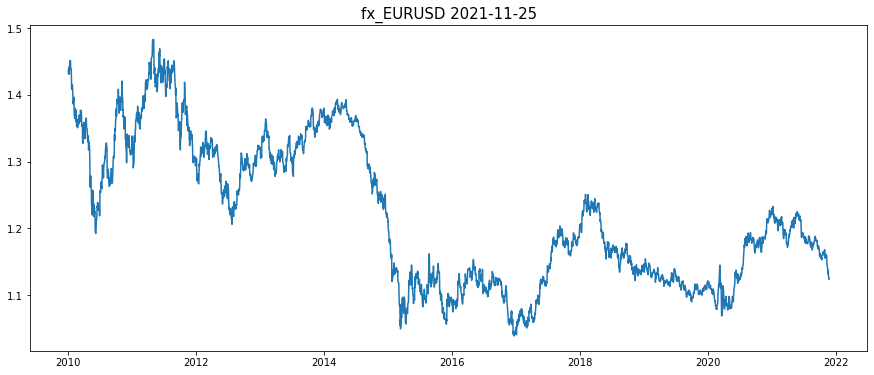

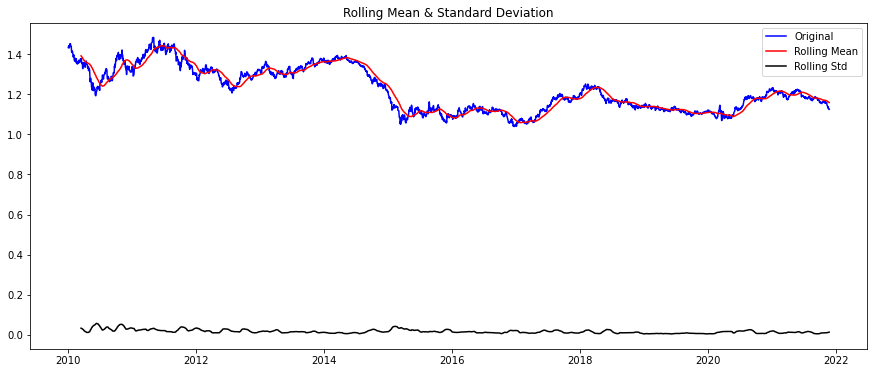

Results of Dickey-Fuller Test:
Test Statistic                   -2.153275
p-value                           0.223639
#Lags Used                        0.000000
Number of Observations Used    3102.000000
Critical Value (1%)              -3.432460
Critical Value (5%)              -2.862472
Critical Value (10%)             -2.567266
dtype: float64


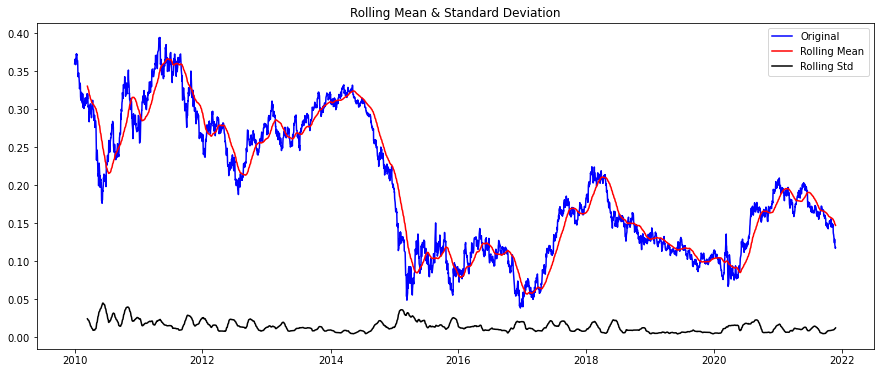

Results of Dickey-Fuller Test:
Test Statistic                   -2.098098
p-value                           0.245280
#Lags Used                        0.000000
Number of Observations Used    3102.000000
Critical Value (1%)              -3.432460
Critical Value (5%)              -2.862472
Critical Value (10%)             -2.567266
dtype: float64


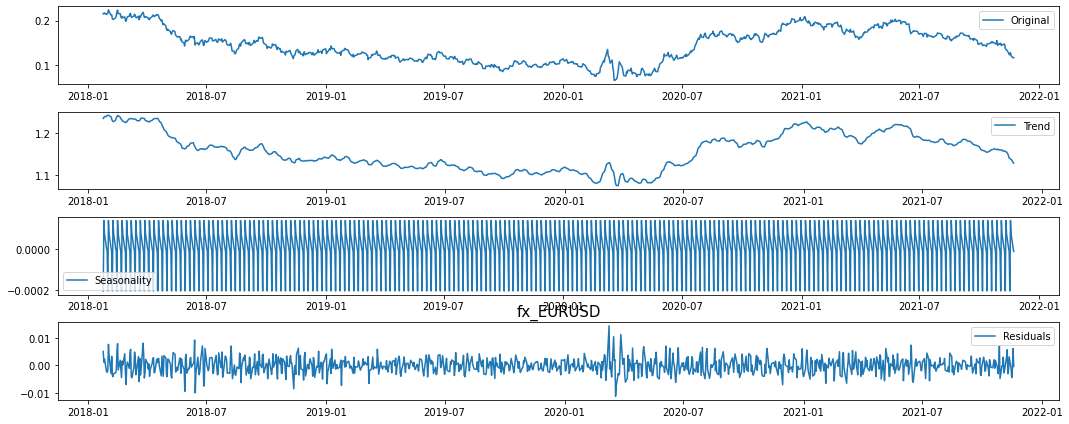

Date
2010-01-01    0.000000
2010-01-04    0.359351
2010-01-05    0.365514
2010-01-06    0.362269
2010-01-07    0.364911
                ...   
2021-11-17    0.124078
2021-11-18    0.124168
2021-11-19    0.128425
2021-11-22    0.121129
2021-11-23    0.116469
Freq: B, Length: 3103, dtype: float64
Date
2010-01-04    0.359351
2010-01-05    0.365514
2010-01-06    0.362269
2010-01-07    0.364911
2010-01-08    0.358401
                ...   
2021-11-17    0.124078
2021-11-18    0.124168
2021-11-19    0.128425
2021-11-22    0.121129
2021-11-23    0.116469
Freq: B, Length: 3102, dtype: float64
Date
2010-01-01    0.000000
2010-01-04    0.359351
2010-01-05    0.365514
2010-01-06    0.362269
2010-01-07    0.364911
Freq: B, dtype: float64
Printing Predicted vs Expected Values...




C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.180743, Expected Euro Rate = 1.183900


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.183759, Expected Euro Rate = 1.187500
Predicted Euro Rate = 1.187516, Expected Euro Rate = 1.188000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.188005, Expected Euro Rate = 1.187000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.186933, Expected Euro Rate = 1.184000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.183994, Expected Euro Rate = 1.181600


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.181603, Expected Euro Rate = 1.182500


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.182574, Expected Euro Rate = 1.181400


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.181534, Expected Euro Rate = 1.181100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.181011, Expected Euro Rate = 1.180300


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.180264, Expected Euro Rate = 1.181700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.181716, Expected Euro Rate = 1.176700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.176784, Expected Euro Rate = 1.172500


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.172456, Expected Euro Rate = 1.172600


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.172701, Expected Euro Rate = 1.172600
Predicted Euro Rate = 1.172768, Expected Euro Rate = 1.168700
Predicted Euro Rate = 1.168650, Expected Euro Rate = 1.173900


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.173762, Expected Euro Rate = 1.172000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.172227, Expected Euro Rate = 1.169500


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.169344, Expected Euro Rate = 1.168300
Predicted Euro Rate = 1.168289, Expected Euro Rate = 1.159800
Predicted Euro Rate = 1.160050, Expected Euro Rate = 1.158000
Predicted Euro Rate = 1.157883, Expected Euro Rate = 1.159600
Predicted Euro Rate = 1.159833, Expected Euro Rate = 1.162100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.162233, Expected Euro Rate = 1.159800
Predicted Euro Rate = 1.159595, Expected Euro Rate = 1.155600
Predicted Euro Rate = 1.155493, Expected Euro Rate = 1.155200


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.155282, Expected Euro Rate = 1.156900


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.157111, Expected Euro Rate = 1.155200
Predicted Euro Rate = 1.155304, Expected Euro Rate = 1.153000
Predicted Euro Rate = 1.152819, Expected Euro Rate = 1.159400
Predicted Euro Rate = 1.159285, Expected Euro Rate = 1.159700
Predicted Euro Rate = 1.159907, Expected Euro Rate = 1.160100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.159939, Expected Euro Rate = 1.161000
Predicted Euro Rate = 1.160958, Expected Euro Rate = 1.163300


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.163358, Expected Euro Rate = 1.165100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.165017, Expected Euro Rate = 1.162300


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.162286, Expected Euro Rate = 1.164300
Predicted Euro Rate = 1.164223, Expected Euro Rate = 1.160800


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.160926, Expected Euro Rate = 1.159600


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.159557, Expected Euro Rate = 1.160300


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.160347, Expected Euro Rate = 1.168100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.168142, Expected Euro Rate = 1.155800
Predicted Euro Rate = 1.155886, Expected Euro Rate = 1.160600
Predicted Euro Rate = 1.160131, Expected Euro Rate = 1.157900
Predicted Euro Rate = 1.158406, Expected Euro Rate = 1.161200


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.161180, Expected Euro Rate = 1.155400
Predicted Euro Rate = 1.155323, Expected Euro Rate = 1.156700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.156582, Expected Euro Rate = 1.158700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.158774, Expected Euro Rate = 1.159300


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.159370, Expected Euro Rate = 1.147900
Predicted Euro Rate = 1.147816, Expected Euro Rate = 1.145100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.144971, Expected Euro Rate = 1.144500


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.144914, Expected Euro Rate = 1.136800


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.136842, Expected Euro Rate = 1.132000
Predicted Euro Rate = 1.131781, Expected Euro Rate = 1.131900


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.132074, Expected Euro Rate = 1.137100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.137274, Expected Euro Rate = 1.129000
Predicted Euro Rate = 1.128854, Expected Euro Rate = 1.123700
Predicted Euro Rate = 1.123526, Expected Euro Rate = 1.124800


Printing Mean Squared Error of Predictions...
Test MSE: 0.000012
Complete
Date
2021-09-02    0.168695
2021-09-03    0.171863
2021-09-06    0.172275
2021-09-07    0.171372
2021-09-08    0.168893
2021-09-09    0.166872
2021-09-10    0.167693
2021-09-13    0.166813
2021-09-14    0.166371
2021-09-15    0.165738
2021-09-16    0.166968
2021-09-17    0.162785
2021-09-20    0.159100
2021-09-21    0.159310
2021-09-22    0.159367
2021-09-23    0.155849
2021-09-24    0.160214
2021-09-27    0.158905
2021-09-28    0.156443
2021-09-29    0.155541
2021-09-30    0.148463
2021-10-01    0.146593
2021-10-04    0.148276
2021-10-05    0.150343
2021-10-06    0.148071
2021-10-07    0.144527
2021-10-08    0.144344
2021-10-11    0.145926
2021-10-12    0.144364
2021-10-13    0.142211
2021-10-14    0.147803
2021-10-15    0.1483

<ipython-input-7-9519d32db9a6>:197: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7-9519d32db9a6>:200: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7-9519d32db9a6>:212: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7

1
fx_GBPUSD
             Value
Date              
2010-01-01  1.6151
2010-01-04  1.6085
2010-01-05  1.5992
2010-01-06  1.6019
2010-01-07  1.5933
...            ...
2021-11-17  1.3487
2021-11-18  1.3494
2021-11-19  1.3451
2021-11-22  1.3397
2021-11-23  1.3378

[3104 rows x 1 columns]


<ipython-input-7-9519d32db9a6>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
C:\Anaconda_2020.11\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


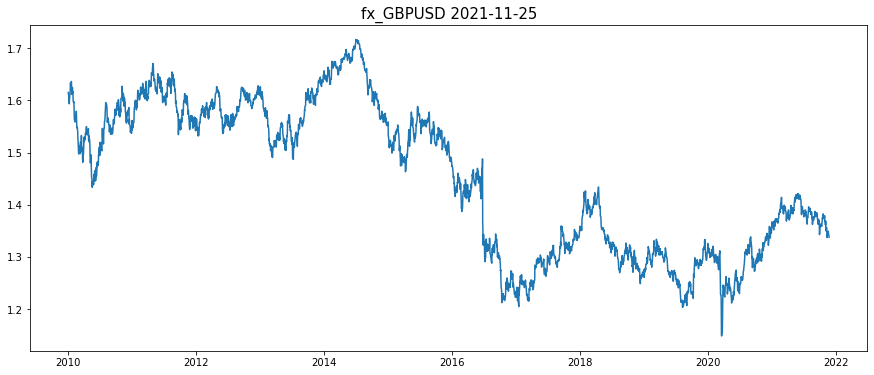

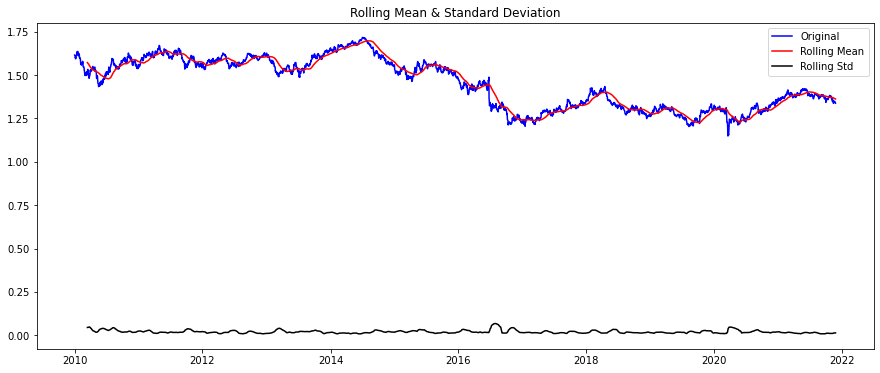

Results of Dickey-Fuller Test:
Test Statistic                   -1.653487
p-value                           0.455222
#Lags Used                        0.000000
Number of Observations Used    3102.000000
Critical Value (1%)              -3.432460
Critical Value (5%)              -2.862472
Critical Value (10%)             -2.567266
dtype: float64


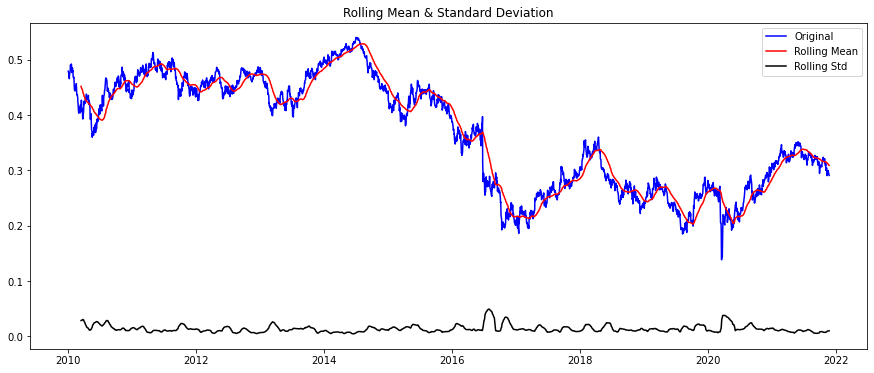

Results of Dickey-Fuller Test:
Test Statistic                   -1.666864
p-value                           0.448261
#Lags Used                        0.000000
Number of Observations Used    3102.000000
Critical Value (1%)              -3.432460
Critical Value (5%)              -2.862472
Critical Value (10%)             -2.567266
dtype: float64


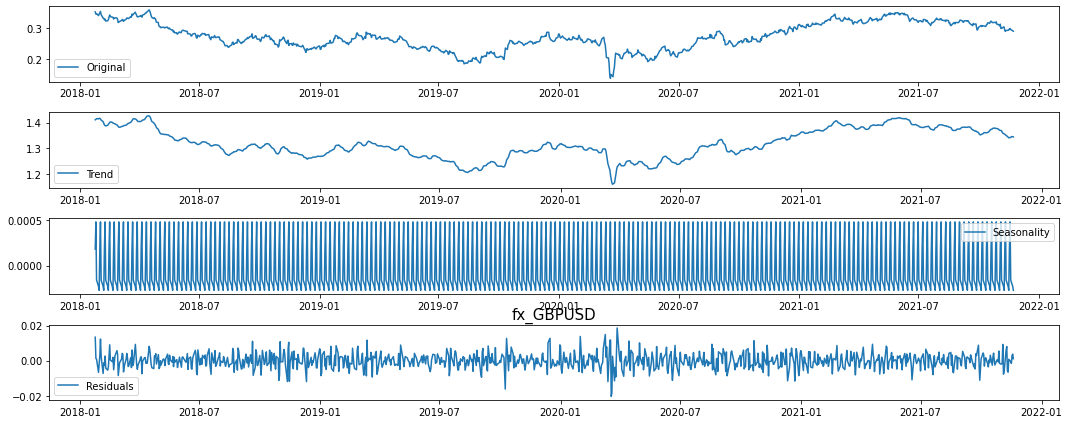

C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\state

Date
2010-01-01    0.000000
2010-01-04    0.479397
2010-01-05    0.475302
2010-01-06    0.469504
2010-01-07    0.471190
                ...   
2021-11-17    0.294906
2021-11-18    0.299141
2021-11-19    0.299660
2021-11-22    0.296468
2021-11-23    0.292446
Freq: B, Length: 3103, dtype: float64
Date
2010-01-04    0.479397
2010-01-05    0.475302
2010-01-06    0.469504
2010-01-07    0.471190
2010-01-08    0.465807
                ...   
2021-11-17    0.294906
2021-11-18    0.299141
2021-11-19    0.299660
2021-11-22    0.296468
2021-11-23    0.292446
Freq: B, Length: 3102, dtype: float64
Date
2010-01-01    0.000000
2010-01-04    0.479397
2010-01-05    0.475302
2010-01-06    0.469504
2010-01-07    0.471190
Freq: B, dtype: float64
Printing Predicted vs Expected Values...


Predicted Euro Rate = 1.375124, Expected Euro Rate = 1.377000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.377434, Expected Euro Rate = 1.383300


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.382997, Expected Euro Rate = 1.387100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.388094, Expected Euro Rate = 1.383700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.383950, Expected Euro Rate = 1.378600


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.377815, Expected Euro Rate = 1.377100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.376866, Expected Euro Rate = 1.383700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.383847, Expected Euro Rate = 1.383900


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.384379, Expected Euro Rate = 1.383800


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.383396, Expected Euro Rate = 1.381000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.381136, Expected Euro Rate = 1.384000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.384023, Expected Euro Rate = 1.379500


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.379814, Expected Euro Rate = 1.374100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.373591, Expected Euro Rate = 1.365700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.365317, Expected Euro Rate = 1.365900


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.365630, Expected Euro Rate = 1.362200


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.362212, Expected Euro Rate = 1.372000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.372123, Expected Euro Rate = 1.367900


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.368199, Expected Euro Rate = 1.369800


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.369190, Expected Euro Rate = 1.353700
Predicted Euro Rate = 1.353700, Expected Euro Rate = 1.342700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.342700, Expected Euro Rate = 1.347400


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.347400, Expected Euro Rate = 1.354600


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.354600, Expected Euro Rate = 1.361000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\state

Predicted Euro Rate = 1.361000, Expected Euro Rate = 1.362900
Predicted Euro Rate = 1.362900, Expected Euro Rate = 1.358200


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.358200, Expected Euro Rate = 1.361900


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\state

Predicted Euro Rate = 1.361900, Expected Euro Rate = 1.361500


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.361500, Expected Euro Rate = 1.359500
Predicted Euro Rate = 1.359500, Expected Euro Rate = 1.358800


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.358800, Expected Euro Rate = 1.365900


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.365900, Expected Euro Rate = 1.367300


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\state

Predicted Euro Rate = 1.367300, Expected Euro Rate = 1.375100
Predicted Euro Rate = 1.375100, Expected Euro Rate = 1.372600


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\state

Predicted Euro Rate = 1.372600, Expected Euro Rate = 1.379700
Predicted Euro Rate = 1.379700, Expected Euro Rate = 1.382400


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.382400, Expected Euro Rate = 1.379300


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.379300, Expected Euro Rate = 1.375500


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.375500, Expected Euro Rate = 1.376700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.376700, Expected Euro Rate = 1.376700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.376700, Expected Euro Rate = 1.374500


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.374500, Expected Euro Rate = 1.379000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\state

Predicted Euro Rate = 1.379000, Expected Euro Rate = 1.368200
Predicted Euro Rate = 1.368200, Expected Euro Rate = 1.366500


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.366500, Expected Euro Rate = 1.361200


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.361200, Expected Euro Rate = 1.368700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.368700, Expected Euro Rate = 1.350000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.350000, Expected Euro Rate = 1.349800


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.349800, Expected Euro Rate = 1.356300


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\state

Predicted Euro Rate = 1.356300, Expected Euro Rate = 1.355700
Predicted Euro Rate = 1.355700, Expected Euro Rate = 1.340500


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\state

Predicted Euro Rate = 1.340500, Expected Euro Rate = 1.337200
Predicted Euro Rate = 1.337200, Expected Euro Rate = 1.341400


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\state

Predicted Euro Rate = 1.341400, Expected Euro Rate = 1.341600
Predicted Euro Rate = 1.341600, Expected Euro Rate = 1.343000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.343000, Expected Euro Rate = 1.348700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.348700, Expected Euro Rate = 1.349400


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.349400, Expected Euro Rate = 1.345100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.345100, Expected Euro Rate = 1.339700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.339700, Expected Euro Rate = 1.337800


Printing Mean Squared Error of Predictions...
Test MSE: 0.000019
Complete
Date
2021-09-02    0.320222
2021-09-03    0.324253
2021-09-06    0.327932
2021-09-07    0.324942
2021-09-08    0.320499
2021-09-09    0.319810
2021-09-10    0.324867
2021-09-13    0.325252
2021-09-14    0.324542
2021-09-15    0.322906
2021-09-16    0.324995
2021-09-17    0.321948
2021-09-20    0.317428
2021-09-21    0.311387
2021-09-22    0.311616
2021-09-23    0.309109
2021-09-24    0.316359
2021-09-27    0.313495
2021-09-28    0.314219
2021-09-29    0.302842
2021-09-30    0.294683
2021-10-01    0.298177
2021-10-04    0.303506
2021-10-05    0.308220
2021-10-06    0.309615
2021-10-07    0.306160
2021-10-08    0.308881
2021-10-11    0.308587
2021-10-12    0.307117
2021-10-13    0.306602
2021-10-14    0.311814
2021-10-15    0.312838
2021-10-18    0.318526
2021-10-19    0.316707
2021-10-20    0.321866
2021-10-21    0.323821
2021-10-22    0.321576
2021-1

C:\Anaconda_2020.11\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


2
[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=874x375 at 0x2749B5C13D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=874x373 at 0x2749B5C1400>]


<ipython-input-7-9519d32db9a6>:197: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7-9519d32db9a6>:200: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7-9519d32db9a6>:212: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7

2
fx_EURNOK
              Value
Date               
2010-01-01   8.2811
2010-01-04   8.2317
2010-01-05   8.2128
2010-01-06   8.1621
2010-01-07   8.1749
...             ...
2021-11-17   9.9023
2021-11-18  10.0223
2021-11-19  10.0683
2021-11-22  10.0319
2021-11-23  10.0091

[3104 rows x 1 columns]


<ipython-input-7-9519d32db9a6>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
C:\Anaconda_2020.11\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


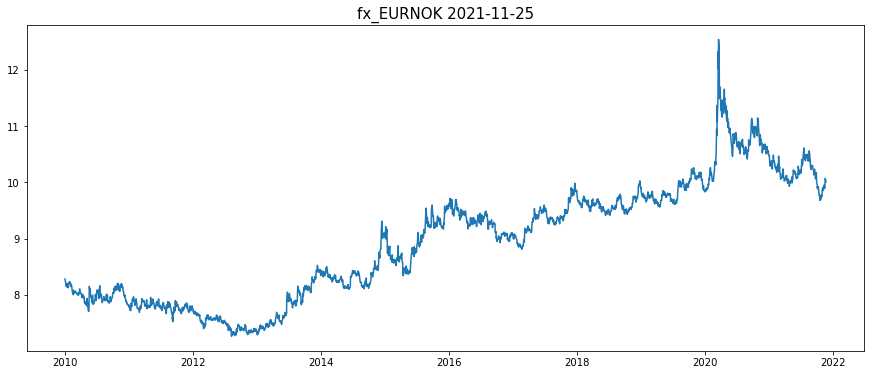

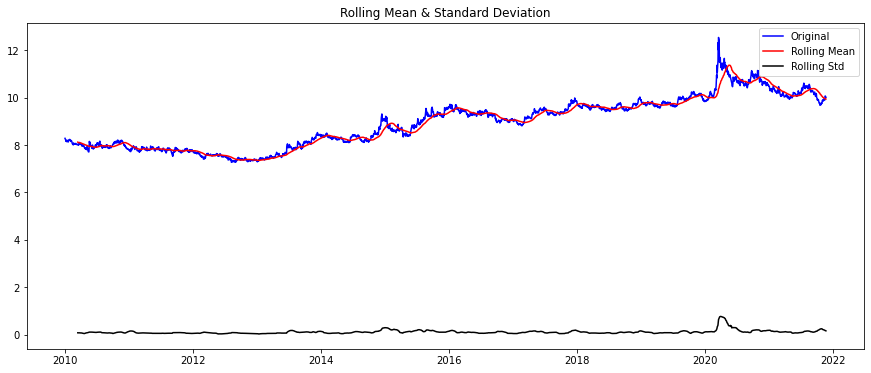

Results of Dickey-Fuller Test:
Test Statistic                   -1.028953
p-value                           0.742559
#Lags Used                       15.000000
Number of Observations Used    3087.000000
Critical Value (1%)              -3.432470
Critical Value (5%)              -2.862477
Critical Value (10%)             -2.567269
dtype: float64


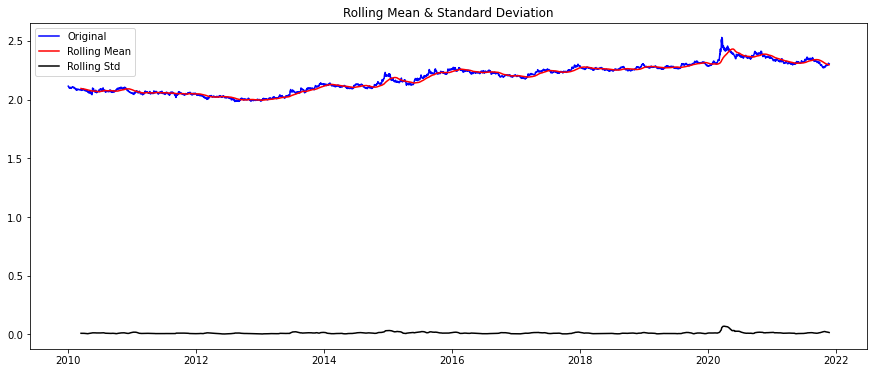

Results of Dickey-Fuller Test:
Test Statistic                   -0.920820
p-value                           0.781039
#Lags Used                       15.000000
Number of Observations Used    3087.000000
Critical Value (1%)              -3.432470
Critical Value (5%)              -2.862477
Critical Value (10%)             -2.567269
dtype: float64


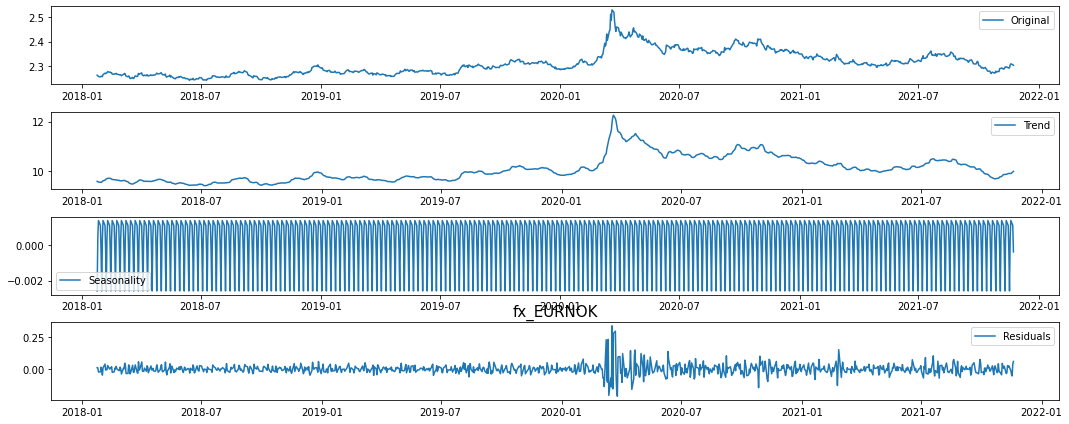

C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Date
2010-01-01    0.000000
2010-01-04    2.113976
2010-01-05    2.108200
2010-01-06    2.105633
2010-01-07    2.099801
                ...   
2021-11-17    2.291742
2021-11-18    2.292698
2021-11-19    2.305001
2021-11-22    2.309238
2021-11-23    2.305875
Freq: B, Length: 3103, dtype: float64
Date
2010-01-04    2.113976
2010-01-05    2.108200
2010-01-06    2.105633
2010-01-07    2.099801
2010-01-08    2.101188
                ...   
2021-11-17    2.291742
2021-11-18    2.292698
2021-11-19    2.305001
2021-11-22    2.309238
2021-11-23    2.305875
Freq: B, Length: 3102, dtype: float64
Date
2010-01-01    0.000000
2010-01-04    2.113976
2010-01-05    2.108200
2010-01-06    2.105633
2010-01-07    2.099801
Freq: B, dtype: float64
Printing Predicted vs Expected Values...




C:\Anaconda_2020.11\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Predicted Euro Rate = 10.271750, Expected Euro Rate = 10.294800
Predicted Euro Rate = 10.282772, Expected Euro Rate = 10.263000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 10.271683, Expected Euro Rate = 10.300400
Predicted Euro Rate = 10.299117, Expected Euro Rate = 10.281400
Predicted Euro Rate = 10.277254, Expected Euro Rate = 10.292400
Predicted Euro Rate = 10.295710, Expected Euro Rate = 10.294000
Predicted Euro Rate = 10.291930, Expected Euro Rate = 10.257200
Predicted Euro Rate = 10.261339, Expected Euro Rate = 10.244200
Predicted Euro Rate = 10.241414, Expected Euro Rate = 10.206600


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 10.206832, Expected Euro Rate = 10.201700
Predicted Euro Rate = 10.206144, Expected Euro Rate = 10.131100
Predicted Euro Rate = 10.132831, Expected Euro Rate = 10.154600


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 10.157568, Expected Euro Rate = 10.212700
Predicted Euro Rate = 10.211280, Expected Euro Rate = 10.232600
Predicted Euro Rate = 10.237231, Expected Euro Rate = 10.184600


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 10.186526, Expected Euro Rate = 10.121500


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 10.117393, Expected Euro Rate = 10.073000
Predicted Euro Rate = 10.074979, Expected Euro Rate = 10.062900
Predicted Euro Rate = 10.063574, Expected Euro Rate = 10.062800
Predicted Euro Rate = 10.069730, Expected Euro Rate = 10.124900
Predicted Euro Rate = 10.126055, Expected Euro Rate = 10.172200


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 10.171083, Expected Euro Rate = 10.129800
Predicted Euro Rate = 10.131672, Expected Euro Rate = 10.007700
Predicted Euro Rate = 10.005975, Expected Euro Rate = 9.959200
Predicted Euro Rate = 9.957864, Expected Euro Rate = 9.895100
Predicted Euro Rate = 9.900311, Expected Euro Rate = 9.918500


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 9.922637, Expected Euro Rate = 9.914500
Predicted Euro Rate = 9.921608, Expected Euro Rate = 9.880200
Predicted Euro Rate = 9.879295, Expected Euro Rate = 9.920300
Predicted Euro Rate = 9.919995, Expected Euro Rate = 9.869100
Predicted Euro Rate = 9.871269, Expected Euro Rate = 9.851700
Predicted Euro Rate = 9.853994, Expected Euro Rate = 9.796400
Predicted Euro Rate = 9.800643, Expected Euro Rate = 9.769700
Predicted Euro Rate = 9.769197, Expected Euro Rate = 9.774100
Predicted Euro Rate = 9.776711, Expected Euro Rate = 9.718300


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 9.720719, Expected Euro Rate = 9.678200
Predicted Euro Rate = 9.677855, Expected Euro Rate = 9.721400


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 9.719138, Expected Euro Rate = 9.733000
Predicted Euro Rate = 9.735882, Expected Euro Rate = 9.698000
Predicted Euro Rate = 9.702280, Expected Euro Rate = 9.700400


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 9.696488, Expected Euro Rate = 9.770500
Predicted Euro Rate = 9.766348, Expected Euro Rate = 9.731000
Predicted Euro Rate = 9.736104, Expected Euro Rate = 9.760300
Predicted Euro Rate = 9.757389, Expected Euro Rate = 9.756000
Predicted Euro Rate = 9.755381, Expected Euro Rate = 9.875100
Predicted Euro Rate = 9.869015, Expected Euro Rate = 9.878300
Predicted Euro Rate = 9.880322, Expected Euro Rate = 9.885500


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 9.884137, Expected Euro Rate = 9.900600
Predicted Euro Rate = 9.893750, Expected Euro Rate = 9.853300
Predicted Euro Rate = 9.854233, Expected Euro Rate = 9.866100
Predicted Euro Rate = 9.862800, Expected Euro Rate = 9.931700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 9.930006, Expected Euro Rate = 9.933200
Predicted Euro Rate = 9.935522, Expected Euro Rate = 9.948200


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 9.943915, Expected Euro Rate = 9.907300
Predicted Euro Rate = 9.908018, Expected Euro Rate = 9.894600


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 9.874865, Expected Euro Rate = 9.902300
Predicted Euro Rate = 9.904225, Expected Euro Rate = 10.022300


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 10.025063, Expected Euro Rate = 10.068300


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 10.066130, Expected Euro Rate = 10.031900
Predicted Euro Rate = 10.033769, Expected Euro Rate = 10.009100


Printing Mean Squared Error of Predictions...
Test MSE: 0.000020
Complete
Date
2021-09-02    2.330470
2021-09-03    2.329391
2021-09-06    2.332058
2021-09-07    2.329933
2021-09-08    2.331727
2021-09-09    2.331360
2021-09-10    2.328383
2021-09-13    2.326440
2021-09-14    2.323057
2021-09-15    2.322990
2021-09-16    2.315781
2021-09-17    2.318219
2021-09-20    2.323493
2021-09-21    2.326031
2021-09-22    2.321066
2021-09-23    2.314256
2021-09-24    2.310055
2021-09-27    2.308922
2021-09-28    2.309534
2021-09-29    2.315112
2021-09-30    2.319549
2021-10-01    2.315666
2021-10-04    2.303182
2021-10-05    2.298363
2021-10-06    2.292566
2021-10-07    2.294819
2021-10-08    2.294715
2021-10-11    2.290441
2021-10-12    2.294552
2021-10-13    2.289628
2021-10-14    2.287877
2021-10-15    2.282448
2021-10-18    2.279234
2021-10-19    2.280003
2021-10-2

C:\Anaconda_2020.11\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


2
[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=871x375 at 0x2749B63B190>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=874x373 at 0x2749B63B970>]


<ipython-input-7-9519d32db9a6>:197: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7-9519d32db9a6>:200: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7-9519d32db9a6>:212: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7

3
fx_AUDUSD
             Value
Date              
2010-01-01  0.8980
2010-01-04  0.9126
2010-01-05  0.9119
2010-01-06  0.9198
2010-01-07  0.9174
...            ...
2021-11-17  0.7267
2021-11-18  0.7277
2021-11-19  0.7235
2021-11-22  0.7225
2021-11-23  0.7228

[3104 rows x 1 columns]


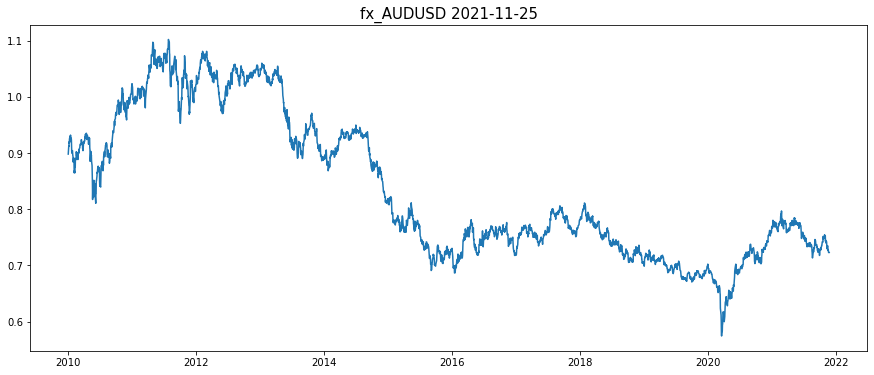

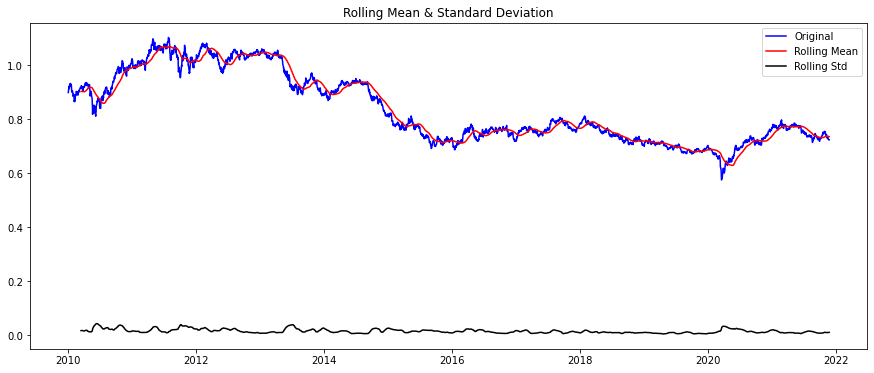

Results of Dickey-Fuller Test:
Test Statistic                   -1.151062
p-value                           0.694286
#Lags Used                        3.000000
Number of Observations Used    3099.000000
Critical Value (1%)              -3.432462
Critical Value (5%)              -2.862473
Critical Value (10%)             -2.567267
dtype: float64


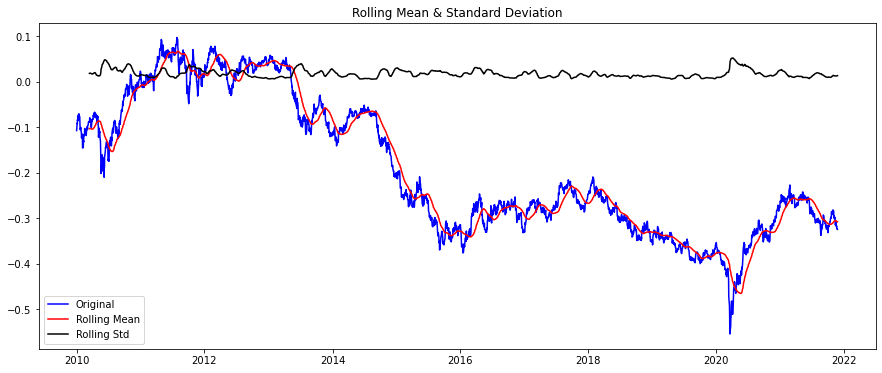

Results of Dickey-Fuller Test:
Test Statistic                   -1.209437
p-value                           0.669523
#Lags Used                        2.000000
Number of Observations Used    3100.000000
Critical Value (1%)              -3.432461
Critical Value (5%)              -2.862473
Critical Value (10%)             -2.567267
dtype: float64


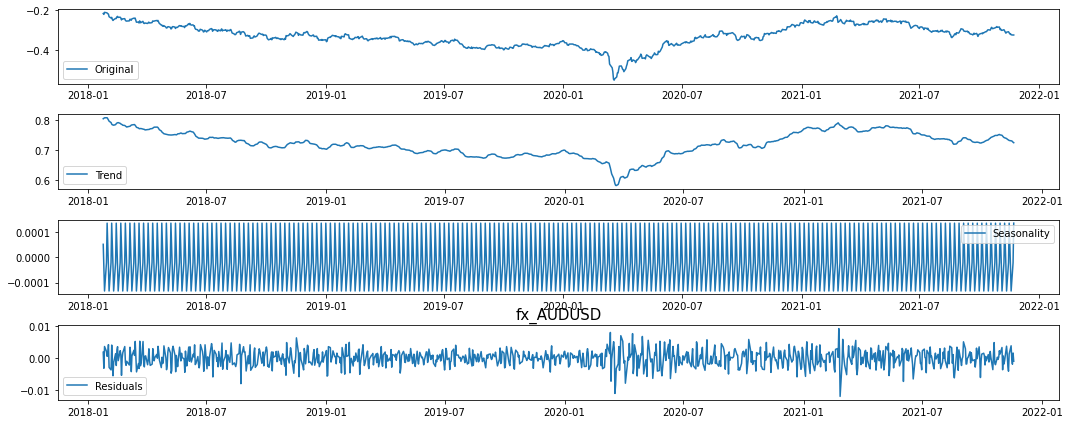

C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Date
2010-01-01    0.000000
2010-01-04   -0.107585
2010-01-05   -0.091458
2010-01-06   -0.092225
2010-01-07   -0.083599
                ...   
2021-11-17   -0.314300
2021-11-18   -0.319242
2021-11-19   -0.317866
2021-11-22   -0.323655
2021-11-23   -0.325038
Freq: B, Length: 3103, dtype: float64
Date
2010-01-04   -0.107585
2010-01-05   -0.091458
2010-01-06   -0.092225
2010-01-07   -0.083599
2010-01-08   -0.086212
                ...   
2021-11-17   -0.314300
2021-11-18   -0.319242
2021-11-19   -0.317866
2021-11-22   -0.323655
2021-11-23   -0.325038
Freq: B, Length: 3102, dtype: float64
Date
2010-01-01    0.000000
2010-01-04   -0.107585
2010-01-05   -0.091458
2010-01-06   -0.092225
2010-01-07   -0.083599
Freq: B, dtype: float64
Printing Predicted vs Expected Values...




C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.731600, Expected Euro Rate = 0.736600


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.736600, Expected Euro Rate = 0.740000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.740000, Expected Euro Rate = 0.746000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.746000, Expected Euro Rate = 0.743900


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.743900, Expected Euro Rate = 0.738600


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.738600, Expected Euro Rate = 0.736500


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.736500, Expected Euro Rate = 0.736800


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.736800, Expected Euro Rate = 0.735600


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.735600, Expected Euro Rate = 0.736900


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.736900, Expected Euro Rate = 0.732000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.732000, Expected Euro Rate = 0.733300


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.733300, Expected Euro Rate = 0.729200


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.729200, Expected Euro Rate = 0.726500


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.726500, Expected Euro Rate = 0.725200


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.725200, Expected Euro Rate = 0.723100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.723100, Expected Euro Rate = 0.724700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.724700, Expected Euro Rate = 0.729500


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.729500, Expected Euro Rate = 0.726200


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\state

Predicted Euro Rate = 0.726200, Expected Euro Rate = 0.728600
Predicted Euro Rate = 0.728600, Expected Euro Rate = 0.723600


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.723600, Expected Euro Rate = 0.717600


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.717600, Expected Euro Rate = 0.722700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.722700, Expected Euro Rate = 0.725800


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.725800, Expected Euro Rate = 0.728100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.728100, Expected Euro Rate = 0.729200


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.729200, Expected Euro Rate = 0.727200


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.727200, Expected Euro Rate = 0.731200


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.731200, Expected Euro Rate = 0.730900


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.730900, Expected Euro Rate = 0.735100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.735100, Expected Euro Rate = 0.735000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.735000, Expected Euro Rate = 0.737900


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.737900, Expected Euro Rate = 0.741600


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.741600, Expected Euro Rate = 0.742100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.742100, Expected Euro Rate = 0.741100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.741100, Expected Euro Rate = 0.747400


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.747400, Expected Euro Rate = 0.751600


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.751600, Expected Euro Rate = 0.746700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.746700, Expected Euro Rate = 0.746600


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.746600, Expected Euro Rate = 0.749100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.749100, Expected Euro Rate = 0.750100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.750100, Expected Euro Rate = 0.751700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.751700, Expected Euro Rate = 0.754400


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.754400, Expected Euro Rate = 0.751800


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.751800, Expected Euro Rate = 0.752600


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.752600, Expected Euro Rate = 0.742900


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.742900, Expected Euro Rate = 0.744800


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.744800, Expected Euro Rate = 0.740100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.740100, Expected Euro Rate = 0.740000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.740000, Expected Euro Rate = 0.742300


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.742300, Expected Euro Rate = 0.737800


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.737800, Expected Euro Rate = 0.732700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.732700, Expected Euro Rate = 0.729400


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.729400, Expected Euro Rate = 0.733200


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.733200, Expected Euro Rate = 0.734700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.734700, Expected Euro Rate = 0.730300


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.730300, Expected Euro Rate = 0.726700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.726700, Expected Euro Rate = 0.727700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.727700, Expected Euro Rate = 0.723500


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.723500, Expected Euro Rate = 0.722500


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.722500, Expected Euro Rate = 0.722800


Printing Mean Squared Error of Predictions...
Test MSE: 0.000022
Complete
Date
2021-09-02   -0.305710
2021-09-03   -0.301105
2021-09-06   -0.293030
2021-09-07   -0.295849
2021-09-08   -0.302999
2021-09-09   -0.305846
2021-09-10   -0.305439
2021-09-13   -0.307069
2021-09-14   -0.305303
2021-09-15   -0.311975
2021-09-16   -0.310200
2021-09-17   -0.315807
2021-09-20   -0.319517
2021-09-21   -0.321308
2021-09-22   -0.324208
2021-09-23   -0.321998
2021-09-24   -0.315396
2021-09-27   -0.319930
2021-09-28   -0.316630
2021-09-29   -0.323517
2021-09-30   -0.331843
2021-10-01   -0.324761
2021-10-04   -0.320481
2021-10-05   -0.317317
2021-10-06   -0.315807
2021-10-07   -0.318554
2021-10-08   -0.313068
2021-10-11   -0.313479
2021-10-12   -0.307749
2021-10-13   -0.307885
2021-10-14   -0.303947
2021-10-15   -0.298945
2021-10-18   -0.298271
2021-10-19   -0.299620
2021-10-20   -0.291155
2021-10-21   -0.285551
2021-10-22   -0.292092
2021-1

<ipython-input-7-9519d32db9a6>:197: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7-9519d32db9a6>:200: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7-9519d32db9a6>:212: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7

4
fx_NZDUSD
             Value
Date              
2010-01-01  0.7231
2010-01-04  0.7344
2010-01-05  0.7346
2010-01-06  0.7378
2010-01-07  0.7319
...            ...
2021-11-17  0.6998
2021-11-18  0.7044
2021-11-19  0.7004
2021-11-22  0.6958
2021-11-23  0.6949

[3104 rows x 1 columns]


<ipython-input-7-9519d32db9a6>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
C:\Anaconda_2020.11\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


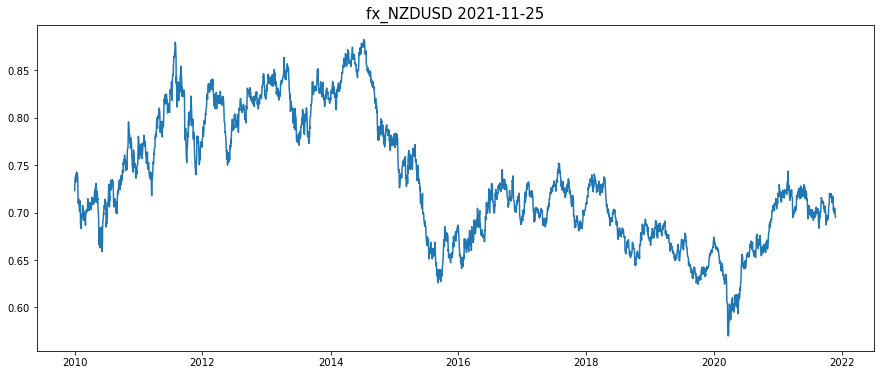

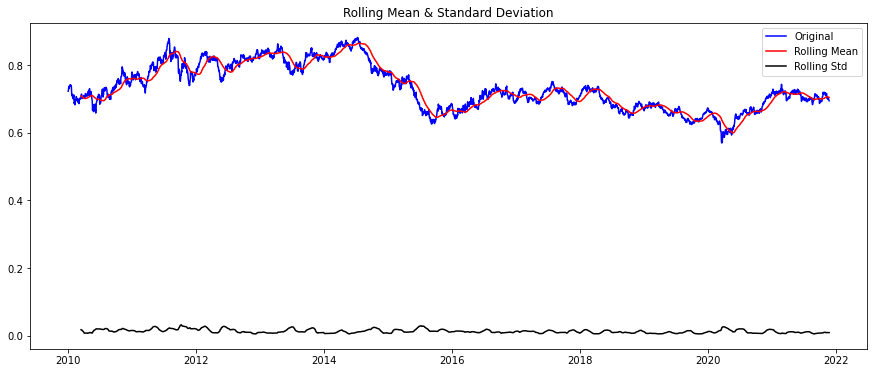

Results of Dickey-Fuller Test:
Test Statistic                   -2.080378
p-value                           0.252477
#Lags Used                        0.000000
Number of Observations Used    3102.000000
Critical Value (1%)              -3.432460
Critical Value (5%)              -2.862472
Critical Value (10%)             -2.567266
dtype: float64


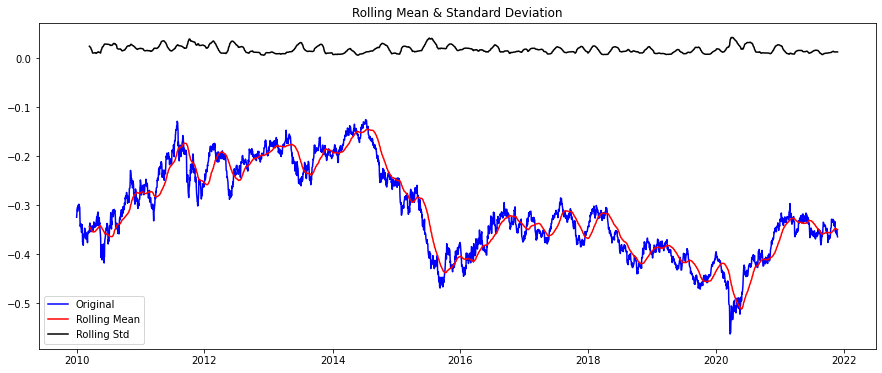

Results of Dickey-Fuller Test:
Test Statistic                   -2.091559
p-value                           0.247922
#Lags Used                        0.000000
Number of Observations Used    3102.000000
Critical Value (1%)              -3.432460
Critical Value (5%)              -2.862472
Critical Value (10%)             -2.567266
dtype: float64


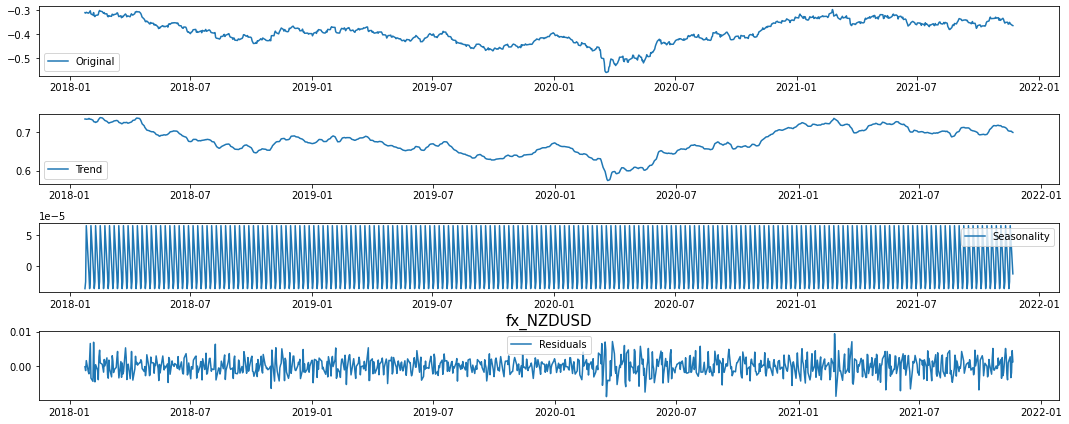

C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Date
2010-01-01    0.000000
2010-01-04   -0.324208
2010-01-05   -0.308701
2010-01-06   -0.308429
2010-01-07   -0.304083
                ...   
2021-11-17   -0.357818
2021-11-18   -0.356961
2021-11-19   -0.350409
2021-11-22   -0.356104
2021-11-23   -0.362693
Freq: B, Length: 3103, dtype: float64
Date
2010-01-04   -0.324208
2010-01-05   -0.308701
2010-01-06   -0.308429
2010-01-07   -0.304083
2010-01-08   -0.312111
                ...   
2021-11-17   -0.357818
2021-11-18   -0.356961
2021-11-19   -0.350409
2021-11-22   -0.356104
2021-11-23   -0.362693
Freq: B, Length: 3102, dtype: float64
Date
2010-01-01    0.000000
2010-01-04   -0.324208
2010-01-05   -0.308701
2010-01-06   -0.308429
2010-01-07   -0.304083
Freq: B, dtype: float64
Printing Predicted vs Expected Values...


Predicted Euro Rate = 0.703941, Expected Euro Rate = 0.707000
Predicted Euro Rate = 0.707140, Expected Euro Rate = 0.711100
Predicted Euro Rate = 0.710942, Expected Euro Rate = 0.715800
Predicted Euro Rate = 0.715564, Exp

C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 0.709968, Expected Euro Rate = 0.709900
Predicted Euro Rate = 0.709690, Expected Euro Rate = 0.710500
Predicted Euro Rate = 0.710436, Expected Euro Rate = 0.711300
Predicted Euro Rate = 0.711388, Expected Euro Rate = 0.711900
Predicted Euro Rate = 0.711929, Expected Euro Rate = 0.709800
Predicted Euro Rate = 0.709808, Expected Euro Rate = 0.710600
Predicted Euro Rate = 0.710601, Expected Euro Rate = 0.707500
Predicted Euro Rate = 0.707656, Expected Euro Rate = 0.704000
Predicted Euro Rate = 0.703811, Expected Euro Rate = 0.702700
Predicted Euro Rate = 0.702747, Expected Euro Rate = 0.700500
Predicted Euro Rate = 0.700602, Expected Euro Rate = 0.700900
Predicted Euro Rate = 0.700732, Expected Euro Rate = 0.706900
Predicted Euro Rate = 0.706932, Expected Euro Rate = 0.701500
Predicted Euro Rate = 0.701898, Expected Euro Rate = 0.701700
Predicted Euro Rate = 0.701468, Expected Euro Rate = 0.695700
Predicted Euro Rate = 0.695950, Expected Euro Rate = 0.686900
Predicte

C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 0.700835, Expected Euro Rate = 0.695800
Predicted Euro Rate = 0.695800, Expected Euro Rate = 0.694900


Printing Mean Squared Error of Predictions...
Test MSE: 0.000029
Complete
Date
2021-09-02   -0.346527
2021-09-03   -0.341165
2021-09-06   -0.334684
2021-09-07   -0.337306
2021-09-08   -0.342535
2021-09-09   -0.342927
2021-09-10   -0.341876
2021-09-13   -0.340538
2021-09-14   -0.339777
2021-09-15   -0.342761
2021-09-16   -0.341644
2021-09-17   -0.345797
2021-09-20   -0.351245
2021-09-21   -0.352759
2021-09-22   -0.355816
2021-09-23   -0.355630
2021-09-24   -0.346821
2021-09-27   -0.353967
2021-09-28   -0.354580
2021-09-29   -0.362477
2021-09-30   -0.375659
2021-10-01   -0.371541
2021-10-04   -0.363976
2021-10-05   -0.361140
2021-10-06   -0.361660
2021-10-07   -0.368718
2021-10-08   -0.367721
2021-10-11   -0.365481
2021-10-12   -0.365311
2021-10-13   -0.366543
2021-10-14   -0.361994
2021-10-15   -0.351540
2021-10-18   -0.347016
2021-10-19   -0.344562
2021-10-20   

<ipython-input-7-9519d32db9a6>:197: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7-9519d32db9a6>:200: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7-9519d32db9a6>:212: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7

5
fx_USDCAD
             Value
Date              
2010-01-01  1.0528
2010-01-04  1.0416
2010-01-05  1.0390
2010-01-06  1.0324
2010-01-07  1.0347
...            ...
2021-11-17  1.2610
2021-11-18  1.2602
2021-11-19  1.2640
2021-11-22  1.2700
2021-11-23  1.2670

[3104 rows x 1 columns]


<ipython-input-7-9519d32db9a6>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
C:\Anaconda_2020.11\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


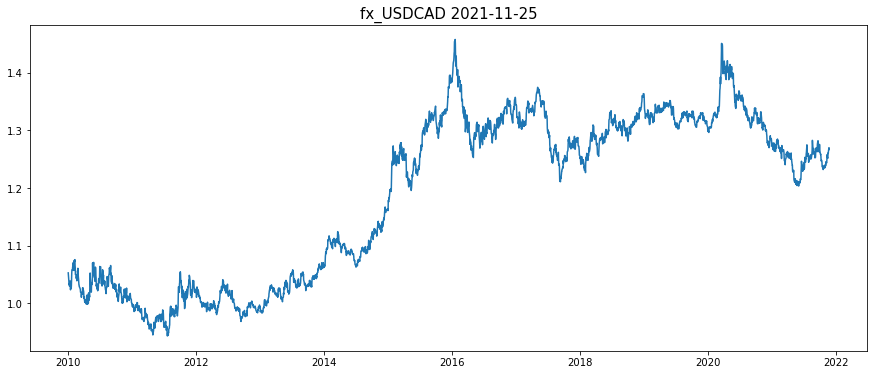

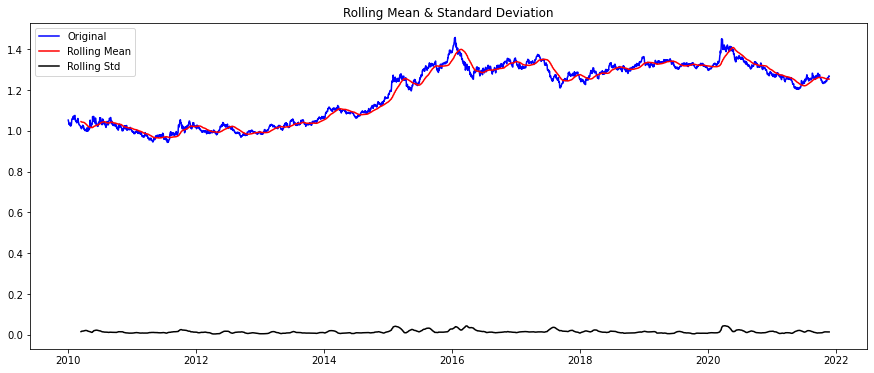

Results of Dickey-Fuller Test:
Test Statistic                   -1.178213
p-value                           0.682897
#Lags Used                       27.000000
Number of Observations Used    3075.000000
Critical Value (1%)              -3.432478
Critical Value (5%)              -2.862480
Critical Value (10%)             -2.567271
dtype: float64


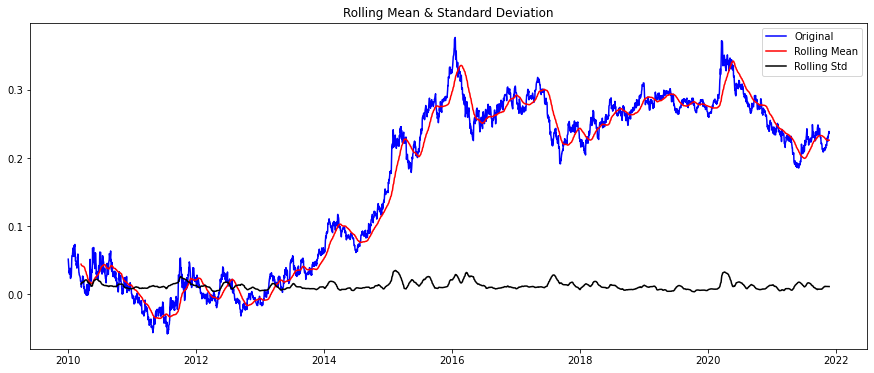

Results of Dickey-Fuller Test:
Test Statistic                   -1.156590
p-value                           0.691985
#Lags Used                       29.000000
Number of Observations Used    3073.000000
Critical Value (1%)              -3.432480
Critical Value (5%)              -2.862481
Critical Value (10%)             -2.567271
dtype: float64


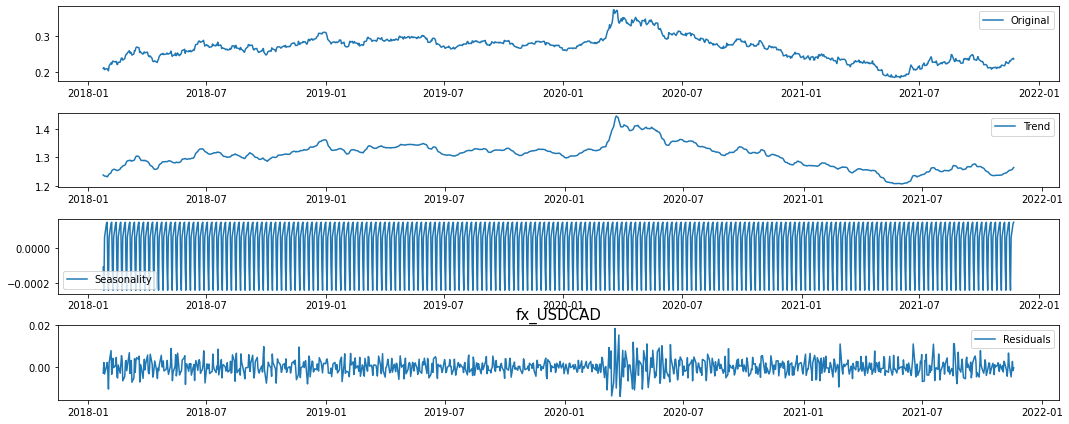

Date
2010-01-01    0.000000
2010-01-04    0.051453
2010-01-05    0.041205
2010-01-06    0.038442
2010-01-07    0.032150
                ...   
2021-11-17    0.227262
2021-11-18    0.231576
2021-11-19    0.231568
2021-11-22    0.234251
2021-11-23    0.238550
Freq: B, Length: 3103, dtype: float64
Date
2010-01-04    0.051453
2010-01-05    0.041205
2010-01-06    0.038442
2010-01-07    0.032150
2010-01-08    0.034192
                ...   
2021-11-17    0.227262
2021-11-18    0.231576
2021-11-19    0.231568
2021-11-22    0.234251
2021-11-23    0.238550
Freq: B, Length: 3102, dtype: float64
Date
2010-01-01    0.000000
2010-01-04    0.051453
2010-01-05    0.041205
2010-01-06    0.038442
2010-01-07    0.032150
Freq: B, dtype: float64
Printing Predicted vs Expected Values...


Predicted Euro Rate = 1.261061, Expected Euro Rate = 1.262000
Predicted Euro Rate = 1.261637, Expected Euro Rate = 1.255300
Predicted Euro Rate = 1.256282, Expected Euro Rate = 1.252400
Predicted Euro Rate = 1.252451, Exp

C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.244696, Expected Euro Rate = 1.237000
Predicted Euro Rate = 1.237621, Expected Euro Rate = 1.236800
Predicted Euro Rate = 1.236600, Expected Euro Rate = 1.237900
Predicted Euro Rate = 1.237975, Expected Euro Rate = 1.236300
Predicted Euro Rate = 1.236453, Expected Euro Rate = 1.232100
Predicted Euro Rate = 1.232644, Expected Euro Rate = 1.236800
Predicted Euro Rate = 1.236381, Expected Euro Rate = 1.236600
Predicted Euro Rate = 1.236575, Expected Euro Rate = 1.238200
Predicted Euro Rate = 1.238210, Expected Euro Rate = 1.239000
Predicted Euro Rate = 1.239112, Expected Euro Rate = 1.235900
Predicted Euro Rate = 1.235683, Expected Euro Rate = 1.234600
Predicted Euro Rate = 1.234819, Expected Euro Rate = 1.238800
Predicted Euro Rate = 1.238452, Expected Euro Rate = 1.236900
Predicted Euro Rate = 1.237115, Expected Euro Rate = 1.241100
Predicted Euro Rate = 1.241064, Expected Euro Rate = 1.239100
Predicted Euro Rate = 1.239108, Expected Euro Rate = 1.245600
Predicte

C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 1.260586, Expected Euro Rate = 1.260200
Predicted Euro Rate = 1.260572, Expected Euro Rate = 1.264000
Predicted Euro Rate = 1.263948, Expected Euro Rate = 1.270000
Predicted Euro Rate = 1.269413, Expected Euro Rate = 1.267000


Printing Mean Squared Error of Predictions...
Test MSE: 0.000014
Complete
Date
2021-09-02    0.232410
2021-09-03    0.228157
2021-09-06    0.225102
2021-09-07    0.225798
2021-09-08    0.234374
2021-09-09    0.238486
2021-09-10    0.236187
2021-09-13    0.238147
2021-09-14    0.234495
2021-09-15    0.238594
2021-09-16    0.233789
2021-09-17    0.237525
2021-09-20    0.243826
2021-09-21    0.248143
2021-09-22    0.248722
2021-09-23    0.244355
2021-09-24    0.235726
2021-09-27    0.235126
2021-09-28    0.233699
2021-09-29    0.238093
2021-09-30    0.243627
2021-10-01    0.237379
2021-10-04    0.235095
2021-10-05    0.229977
2021-10-06    0.229905
2021-10-07    0.230714
2021-10-08    0.227453
2021-10-11    0.221334
2021-10-12    0.221575
2021

<ipython-input-7-9519d32db9a6>:197: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7-9519d32db9a6>:200: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7-9519d32db9a6>:212: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7

6
fx_USDJPY
             Value
Date              
2010-01-01   93.04
2010-01-04   92.51
2010-01-05   91.72
2010-01-06   92.32
2010-01-07   93.37
...            ...
2021-11-17  114.08
2021-11-18  114.26
2021-11-19  113.99
2021-11-22  114.88
2021-11-23  115.14

[3104 rows x 1 columns]


<ipython-input-7-9519d32db9a6>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
C:\Anaconda_2020.11\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


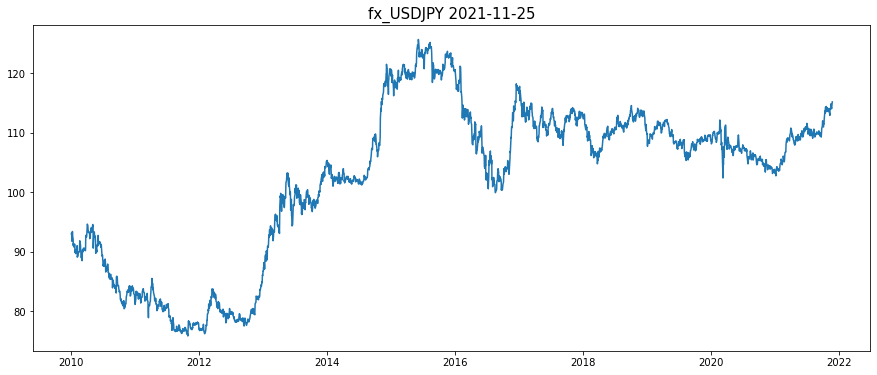

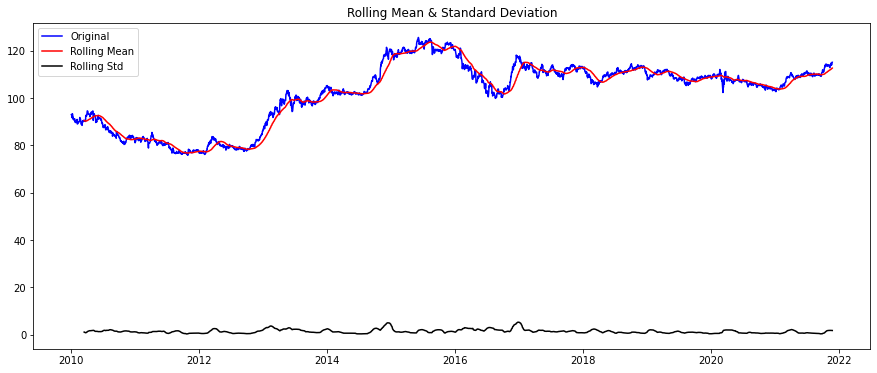

Results of Dickey-Fuller Test:
Test Statistic                   -1.091753
p-value                           0.718350
#Lags Used                        0.000000
Number of Observations Used    3102.000000
Critical Value (1%)              -3.432460
Critical Value (5%)              -2.862472
Critical Value (10%)             -2.567266
dtype: float64


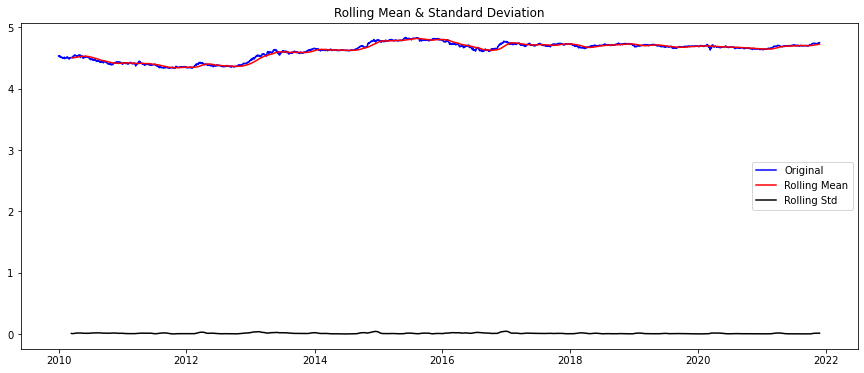

Results of Dickey-Fuller Test:
Test Statistic                   -1.021164
p-value                           0.745467
#Lags Used                        0.000000
Number of Observations Used    3102.000000
Critical Value (1%)              -3.432460
Critical Value (5%)              -2.862472
Critical Value (10%)             -2.567266
dtype: float64


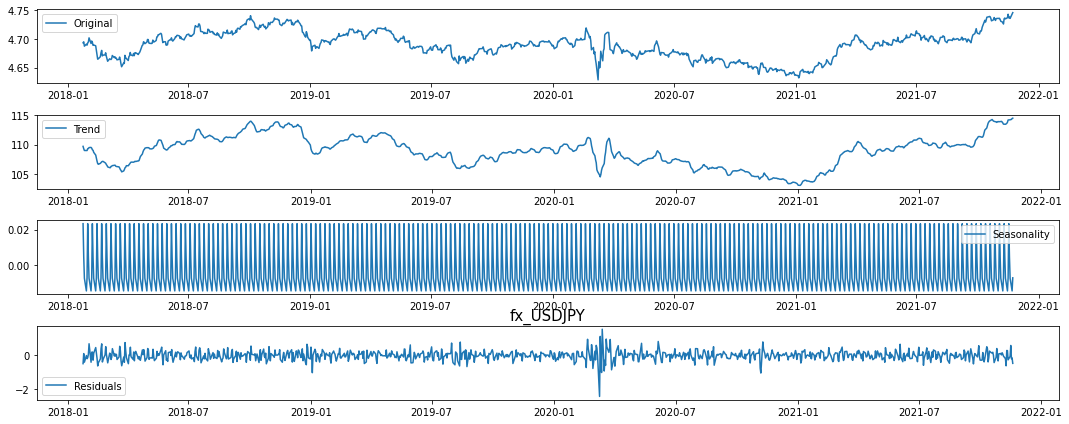

C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda_2020.11\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Date
2010-01-01    0.000000
2010-01-04    4.533030
2010-01-05    4.527371
2010-01-06    4.518775
2010-01-07    4.525176
                ...   
2021-11-17    4.743132
2021-11-18    4.737007
2021-11-19    4.738386
2021-11-22    4.736104
2021-11-23    4.743590
Freq: B, Length: 3103, dtype: float64
Date
2010-01-04    4.533030
2010-01-05    4.527371
2010-01-06    4.518775
2010-01-07    4.525176
2010-01-08    4.536561
                ...   
2021-11-17    4.743132
2021-11-18    4.737007
2021-11-19    4.738386
2021-11-22    4.736104
2021-11-23    4.743590
Freq: B, Length: 3102, dtype: float64
Date
2010-01-01    0.000000
2010-01-04    4.533030
2010-01-05    4.527371
2010-01-06    4.518775
2010-01-07    4.525176
Freq: B, dtype: float64
Printing Predicted vs Expected Values...


Predicted Euro Rate = 110.009759, Expected Euro Rate = 110.010000
Predicted Euro Rate = 110.012625, Expected Euro Rate = 109.940000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 109.943198, Expected Euro Rate = 109.710000
Predicted Euro Rate = 109.702531, Expected Euro Rate = 109.860000
Predicted Euro Rate = 109.858654, Expected Euro Rate = 110.280000
Predicted Euro Rate = 110.280423, Expected Euro Rate = 110.250000
Predicted Euro Rate = 110.248820, Expected Euro Rate = 109.720000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 109.729137, Expected Euro Rate = 109.940000
Predicted Euro Rate = 109.931675, Expected Euro Rate = 109.990000
Predicted Euro Rate = 109.985126, Expected Euro Rate = 109.690000
Predicted Euro Rate = 109.695605, Expected Euro Rate = 109.380000
Predicted Euro Rate = 109.389636, Expected Euro Rate = 109.730000
Predicted Euro Rate = 109.713478, Expected Euro Rate = 109.930000
Predicted Euro Rate = 109.940034, Expected Euro Rate = 109.440000
Predicted Euro Rate = 109.452875, Expected Euro Rate = 109.230000
Predicted Euro Rate = 109.229245, Expected Euro Rate = 109.780000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 109.770042, Expected Euro Rate = 110.330000
Predicted Euro Rate = 110.334408, Expected Euro Rate = 110.730000
Predicted Euro Rate = 110.733981, Expected Euro Rate = 111.000000
Predicted Euro Rate = 110.997448, Expected Euro Rate = 111.500000
Predicted Euro Rate = 111.485859, Expected Euro Rate = 111.960000
Predicted Euro Rate = 111.951524, Expected Euro Rate = 111.290000
Predicted Euro Rate = 111.283150, Expected Euro Rate = 111.050000
Predicted Euro Rate = 111.030530, Expected Euro Rate = 110.930000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 110.916376, Expected Euro Rate = 111.460000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 111.437982, Expected Euro Rate = 111.410000
Predicted Euro Rate = 111.424179, Expected Euro Rate = 111.630000
Predicted Euro Rate = 111.617907, Expected Euro Rate = 112.240000
Predicted Euro Rate = 112.239637, Expected Euro Rate = 113.310000
Predicted Euro Rate = 113.294585, Expected Euro Rate = 113.610000
Predicted Euro Rate = 113.618686, Expected Euro Rate = 113.250000
Predicted Euro Rate = 113.236912, Expected Euro Rate = 113.680000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 113.659313, Expected Euro Rate = 114.220000
Predicted Euro Rate = 114.194810, Expected Euro Rate = 114.320000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 114.310306, Expected Euro Rate = 114.380000
Predicted Euro Rate = 114.372972, Expected Euro Rate = 114.310000
Predicted Euro Rate = 114.290711, Expected Euro Rate = 113.990000
Predicted Euro Rate = 113.978474, Expected Euro Rate = 113.500000
Predicted Euro Rate = 113.499027, Expected Euro Rate = 113.710000
Predicted Euro Rate = 113.695055, Expected Euro Rate = 114.160000
Predicted Euro Rate = 114.158046, Expected Euro Rate = 113.830000
Predicted Euro Rate = 113.842399, Expected Euro Rate = 113.580000
Predicted Euro Rate = 113.586074, Expected Euro Rate = 113.950000
Predicted Euro Rate = 113.943485, Expected Euro Rate = 114.000000
Predicted Euro Rate = 114.001409, Expected Euro Rate = 113.960000
Predicted Euro Rate = 113.968983, Expected Euro Rate = 114.010000
Predicted Euro Rate = 114.010596, Expected Euro Rate = 113.760000
Predicted Euro Rate = 113.754267, Expected Euro Rate = 113.410000
Predicted Euro Rate = 113.416345, Expected Euro Rate = 113.230000
Predicted 

C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 112.867984, Expected Euro Rate = 113.910000
Predicted Euro Rate = 113.906937, Expected Euro Rate = 114.060000
Predicted Euro Rate = 114.077203, Expected Euro Rate = 113.890000
Predicted Euro Rate = 113.886211, Expected Euro Rate = 114.120000
Predicted Euro Rate = 114.132523, Expected Euro Rate = 114.820000
Predicted Euro Rate = 114.793601, Expected Euro Rate = 114.080000
Predicted Euro Rate = 114.092217, Expected Euro Rate = 114.260000
Predicted Euro Rate = 114.250019, Expected Euro Rate = 113.990000


C:\Anaconda_2020.11\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted Euro Rate = 113.987481, Expected Euro Rate = 114.880000
Predicted Euro Rate = 114.845274, Expected Euro Rate = 115.140000


Printing Mean Squared Error of Predictions...
Test MSE: 0.000013
Complete
Date
2021-09-02    4.700595
2021-09-03    4.699964
2021-09-06    4.697772
2021-09-07    4.699195
2021-09-08    4.703026
2021-09-09    4.702740
2021-09-10    4.698015
2021-09-13    4.699859
2021-09-14    4.700345
2021-09-15    4.697709
2021-09-16    4.694916
2021-09-17    4.697872
2021-09-20    4.699935
2021-09-21    4.695494
2021-09-22    4.693449
2021-09-23    4.698388
2021-09-24    4.703516
2021-09-27    4.707131
2021-09-28    4.709507
2021-09-29    4.713898
2021-09-30    4.718066
2021-10-01    4.712078
2021-10-04    4.709805
2021-10-05    4.708777
2021-10-06    4.713468
2021-10-07    4.713344
2021-10-08    4.715081
2021-10-11    4.720636
2021-10-12    4.729991
2021-10-13    4.732848
2021-10-14    4.729482
2021-10-15    4.733205
2021-10-18    4.737906
2021-10-19    4.738917
2021-

C:\Anaconda_2020.11\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


2
[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=877x375 at 0x2749BBBA0D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=864x373 at 0x2749BBBA7C0>]


<ipython-input-7-9519d32db9a6>:197: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7-9519d32db9a6>:200: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7-9519d32db9a6>:212: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7

7
fx_EURCHF
              Value
Date               
2010-01-01  1.48365
2010-01-04  1.48440
2010-01-05  1.48485
2010-01-06  1.48064
2010-01-07  1.47971
...             ...
2021-11-17  1.05076
2021-11-18  1.05266
2021-11-19  1.04786
2021-11-22  1.04830
2021-11-23  1.04983

[3104 rows x 1 columns]


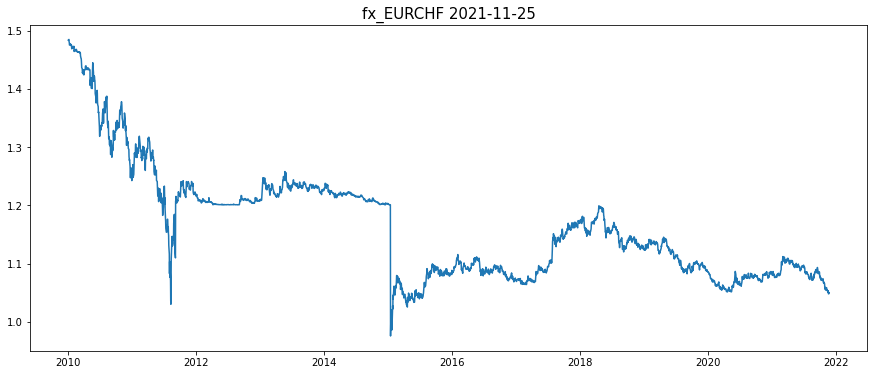

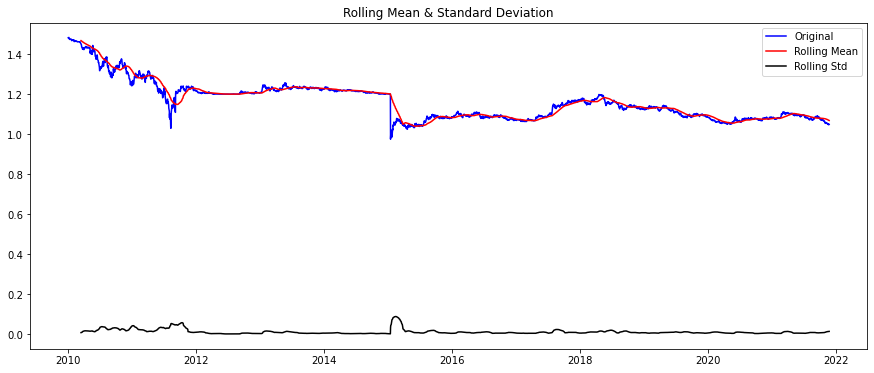

Results of Dickey-Fuller Test:
Test Statistic                   -3.205454
p-value                           0.019671
#Lags Used                       27.000000
Number of Observations Used    3075.000000
Critical Value (1%)              -3.432478
Critical Value (5%)              -2.862480
Critical Value (10%)             -2.567271
dtype: float64


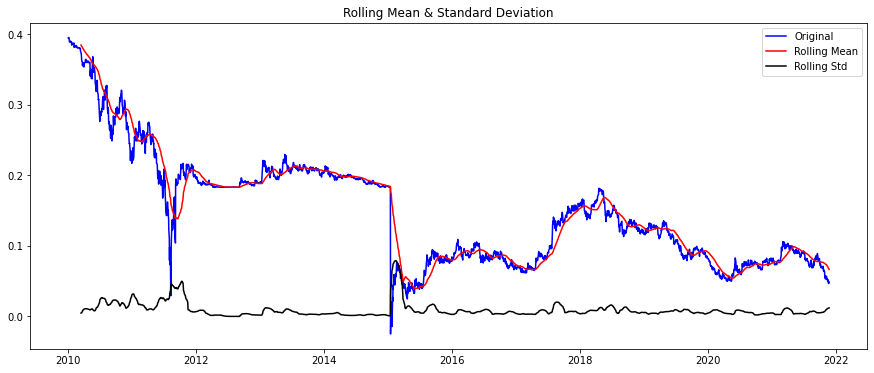

Results of Dickey-Fuller Test:
Test Statistic                   -2.884717
p-value                           0.047154
#Lags Used                       27.000000
Number of Observations Used    3075.000000
Critical Value (1%)              -3.432478
Critical Value (5%)              -2.862480
Critical Value (10%)             -2.567271
dtype: float64


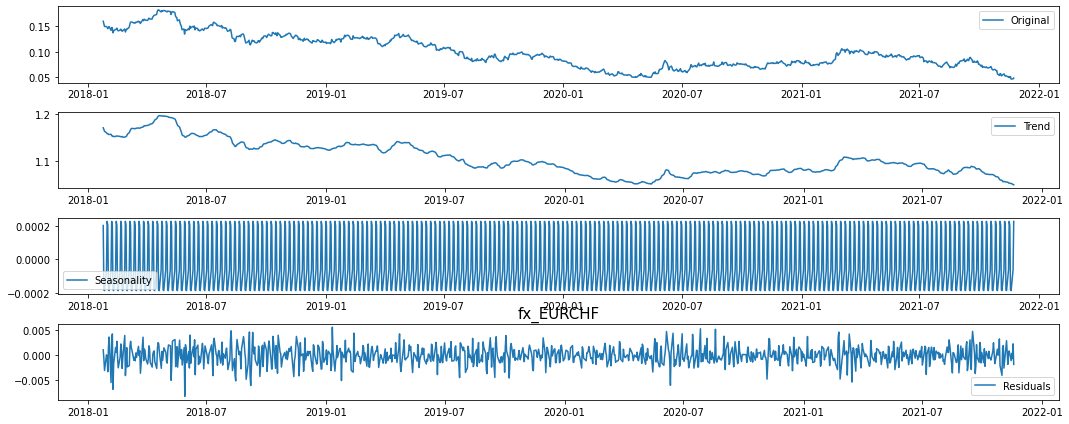

C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Date
2010-01-01    0.000000
2010-01-04    0.394505
2010-01-05    0.395011
2010-01-06    0.395314
2010-01-07    0.392474
                ...   
2021-11-17    0.051738
2021-11-18    0.049514
2021-11-19    0.051320
2021-11-22    0.046750
2021-11-23    0.047170
Freq: B, Length: 3103, dtype: float64
Date
2010-01-04    0.394505
2010-01-05    0.395011
2010-01-06    0.395314
2010-01-07    0.392474
2010-01-08    0.391846
                ...   
2021-11-17    0.051738
2021-11-18    0.049514
2021-11-19    0.051320
2021-11-22    0.046750
2021-11-23    0.047170
Freq: B, Length: 3102, dtype: float64
Date
2010-01-01    0.000000
2010-01-04    0.394505
2010-01-05    0.395011
2010-01-06    0.395314
2010-01-07    0.392474
Freq: B, dtype: float64
Printing Predicted vs Expected Values...




C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.080750, Expected Euro Rate = 1.084140


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.084140, Expected Euro Rate = 1.085750


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.085750, Expected Euro Rate = 1.085650


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.085650, Expected Euro Rate = 1.086330


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.086330, Expected Euro Rate = 1.088920


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.088920, Expected Euro Rate = 1.089570


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.089570, Expected Euro Rate = 1.083950


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.083950, Expected Euro Rate = 1.084400


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.084400, Expected Euro Rate = 1.089150


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.089150, Expected Euro Rate = 1.086240


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.086240, Expected Euro Rate = 1.086800


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.086800, Expected Euro Rate = 1.091830


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.091830, Expected Euro Rate = 1.093180


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.093180, Expected Euro Rate = 1.087950


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.087950, Expected Euro Rate = 1.082990


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.082990, Expected Euro Rate = 1.082590


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.082590, Expected Euro Rate = 1.085370


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.085370, Expected Euro Rate = 1.083380


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.083380, Expected Euro Rate = 1.082760


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.082760, Expected Euro Rate = 1.085680


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.085680, Expected Euro Rate = 1.083890


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.083890, Expected Euro Rate = 1.078570


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.078570, Expected Euro Rate = 1.078820


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.078820, Expected Euro Rate = 1.074490


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.074490, Expected Euro Rate = 1.076480


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.076480, Expected Euro Rate = 1.071780


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.071780, Expected Euro Rate = 1.073040


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.073040, Expected Euro Rate = 1.073160


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.073160, Expected Euro Rate = 1.071760


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.071760, Expected Euro Rate = 1.073150


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.073150, Expected Euro Rate = 1.071360


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.071360, Expected Euro Rate = 1.071120


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.071120, Expected Euro Rate = 1.070790


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.070790, Expected Euro Rate = 1.072560


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.072560, Expected Euro Rate = 1.073800


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.073800, Expected Euro Rate = 1.070670


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.070670, Expected Euro Rate = 1.067450


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.067450, Expected Euro Rate = 1.066640


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.066640, Expected Euro Rate = 1.067960


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.067960, Expected Euro Rate = 1.066590


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.066590, Expected Euro Rate = 1.065280


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.065280, Expected Euro Rate = 1.065260


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.065260, Expected Euro Rate = 1.058380


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.058380, Expected Euro Rate = 1.055240


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.055240, Expected Euro Rate = 1.059010


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.059010, Expected Euro Rate = 1.058700


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.058700, Expected Euro Rate = 1.054440


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.054440, Expected Euro Rate = 1.055250


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.055250, Expected Euro Rate = 1.058580


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.058580, Expected Euro Rate = 1.056380


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.056380, Expected Euro Rate = 1.053900


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.053900, Expected Euro Rate = 1.054520


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.054520, Expected Euro Rate = 1.054180


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.054180, Expected Euro Rate = 1.051710


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.051710, Expected Euro Rate = 1.053100


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.053100, Expected Euro Rate = 1.050760


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.050760, Expected Euro Rate = 1.052660


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.052660, Expected Euro Rate = 1.047860


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.047860, Expected Euro Rate = 1.048300


C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda_2020.11\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted Euro Rate = 1.048300, Expected Euro Rate = 1.049830


Printing Mean Squared Error of Predictions...
Test MSE: 0.000007
Complete
Date
2021-09-02    0.080787
2021-09-03    0.082271
2021-09-06    0.082179
2021-09-07    0.082805
2021-09-08    0.085186
2021-09-09    0.085783
2021-09-10    0.080612
2021-09-13    0.081027
2021-09-14    0.085398
2021-09-15    0.082722
2021-09-16    0.083238
2021-09-17    0.087855
2021-09-20    0.089091
2021-09-21    0.084295
2021-09-22    0.079726
2021-09-23    0.079356
2021-09-24    0.081921
2021-09-27    0.080086
2021-09-28    0.079513
2021-09-29    0.082207
2021-09-30    0.080556
2021-10-01    0.075636
2021-10-04    0.075868
2021-10-05    0.071846
2021-10-06    0.073696
2021-10-07    0.069321
2021-10-08    0.070496
2021-10-11    0.070608
2021-10-12    0.069302
2021-10-13    0.070598
2021-10-14    0.068929
2021-10-15    0.068705
2021-10-18    0.068397
2021-10-19    0.070048
2021-10-20    0.071204
2021-10-21    0.068285
2021-10-22    0.065273
2021-1

<ipython-input-7-9519d32db9a6>:197: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7-9519d32db9a6>:200: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7-9519d32db9a6>:212: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-7

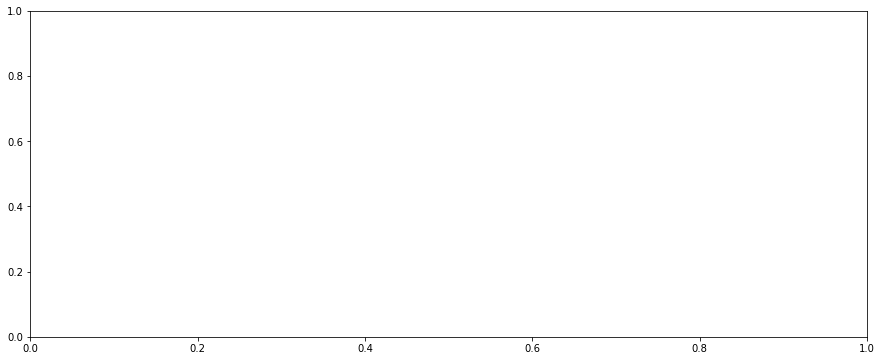

In [7]:
   
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf   

import PIL
from PIL import Image
#import os
#

os.chdir('K:/2020_2431/q/fx_g10/arima_model')

print(os.getcwd())


list_x0=['fx_EURUSD','fx_GBPUSD','fx_EURNOK','fx_AUDUSD','fx_NZDUSD','fx_USDCAD','fx_USDJPY','fx_EURCHF']

loop_list=list_x0
for x in range(len(loop_list)): 
    print(x)
    variable=str(loop_list[x])
    print(variable)

    df = fx_tmp[['date',str(variable)]]
    df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

    df.rename(columns={'date':'Date'}, inplace=True)
    df = df.set_index('Date')
    #df = df.set_index('date')
    df[str(variable)] = pd.to_numeric(df[str(variable)], errors='coerce')
    #df['fx_GBPUSD']=endog['fx_GBPUSD'].rolling(window=5).mean()
    df.interpolate(method='linear', inplace=True)
    df.rename(columns={str(variable):'Value'}, inplace=True)

    #data.index = pd.to_datetime(data.index)
    print(df)

    df_data_1 =df
    df_fx_data = df_data_1
    #df_fx_data['Date'] = pd.to_datetime(df_fx_data['Date'], format = '%Y-%m-%d')
    indexed_df = df_fx_data
    
    ts_euro = indexed_df['Value']
    plt.plot(ts_euro.index, ts_euro.values)
    plt.title(str(variable+" "+end), size=15)
    plt.savefig("graph1.jpg", bbox_inches='tight')
    plt.show()
    plt.close()
    plt.close('all')
    plt.clf()
    plt.cla()
    
    #ts_euro_week = ts_euro.resample('W').mean()
    ts_euro_week = ts_euro
    ts_euro_week = ts_euro.resample('B').mean()
    plt.plot(ts_euro_week.index.to_pydatetime(), ts_euro_week.values)
    plt.savefig("graph11.jpg", bbox_inches='tight')
    plt.close()
    plt.close('all')
    plt.clf()
    plt.cla()
    
    check_stationarity(ts_euro_week)
    ts_euro_week_log = np.log(ts_euro_week)
    check_stationarity(ts_euro_week_log)
    
    
    paramenter=-1000

    decomposition = seasonal_decompose(ts_euro_week)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Select the most recent weeks 
    ts_euro_week_log_select = ts_euro_week_log[paramenter:]

    plt.subplot(411)
    plt.plot(ts_euro_week_log_select.index.to_pydatetime(), ts_euro_week_log_select.values, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(ts_euro_week_log_select.index.to_pydatetime(), trend[paramenter:].values, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(ts_euro_week_log_select.index.to_pydatetime(), seasonal[paramenter:].values,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(ts_euro_week_log_select.index.to_pydatetime(), residual[paramenter:].values, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.title(str(variable), size=15)
    plt.savefig("graph3.jpg", bbox_inches='tight')
    plt.show()
    plt.close()
    plt.close('all')
    plt.clf()
    plt.cla()
    
    
    

    model = ARIMA(ts_euro_week_log, order=(5, 1, 5))  
    #results_ARIMA = model.fit(disp=-1) 
    results_ARIMA = model.fit() 
    #results_ARIMA = model.fit()
    

    model = ARIMA(ts_euro_week_log, order=(5, 1, 5))  
    #results_ARIMA = model.fit(disp=-1)  
    results_ARIMA = model.fit()  
    print(results_ARIMA)
    print(results_ARIMA.fittedvalues)
    #df = df.iloc[3:]
    results_ARIMA1=results_ARIMA.fittedvalues.iloc[1:]
    print(results_ARIMA1)
    
    
    
    
    euro_predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    print (euro_predictions_ARIMA_diff.head())
    euro_predictions_ARIMA_diff_cumsum = euro_predictions_ARIMA_diff.cumsum()
    ############
    euro_predictions_ARIMA_log = pd.Series(ts_euro_week_log.iloc[0], index=ts_euro_week_log.index)
    ###########
    euro_predictions_ARIMA_log = euro_predictions_ARIMA_log.add(euro_predictions_ARIMA_diff_cumsum,fill_value=0)
    euro_predictions_ARIMA = np.exp(euro_predictions_ARIMA_log)



    size = int(len(ts_euro_week_log) - 60)
    train, test = ts_euro_week_log[0:size], ts_euro_week_log[size:len(ts_euro_week_log)]
    historical = [x for x in train]
    predictions = list()

    print('Printing Predicted vs Expected Values...')
    print('\n')
    for t in range(len(test)):
        model = ARIMA(historical, order=(5,1,5))
        model_fit = model.fit()
        output = model_fit.forecast()
        #output=output.iloc[1:]
        yhat = output[0]
        predictions.append(float(yhat))
        observed = test[t]
        historical.append(observed)
        print('Predicted Euro Rate = %f, Expected Euro Rate = %f' % (np.exp(yhat), np.exp(observed)))

    error = mean_squared_error(test, predictions)

    print('\n')
    print('Printing Mean Squared Error of Predictions...')
    print('Test MSE: %.6f' % error)

    euro_predictions_series = pd.Series(predictions, index = test.index)

    print("Complete")


    euro_predictions_series=euro_predictions_series.iloc[1:]
    print(euro_predictions_series)






    euro_predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    print (euro_predictions_ARIMA_diff.head())
    euro_predictions_ARIMA_diff_cumsum = euro_predictions_ARIMA_diff.cumsum()
    ############
    euro_predictions_ARIMA_log = pd.Series(ts_euro_week_log.iloc[0], index=ts_euro_week_log.index)
    ###########
    euro_predictions_ARIMA_log = euro_predictions_ARIMA_log.add(euro_predictions_ARIMA_diff_cumsum,fill_value=0)
    euro_predictions_ARIMA = np.exp(euro_predictions_ARIMA_log)



    fig, ax = plt.subplots()
    ax.set(title='Spot Exchange Rate '+str(variable)+" "+str(end), xlabel='Date', ylabel='Euro into USD')
    ax.plot(ts_euro_week[-200:],  label='observed')
    ax.plot(np.exp(euro_predictions_series), 'g', label='rolling one-step out-of-sample forecast')
    legend = ax.legend(loc='upper left')
    legend.get_frame().set_facecolor('w')
    plt.savefig("graph4.jpg", bbox_inches='tight')
    plt.close()
    plt.close('all')
    plt.clf()
    plt.cla()
    
    
    
    list_im = [str("graph1.jpg"),str("graph2.jpg"),]
    imgs    = [ PIL.Image.open(i) for i in list_im ]
    print(len(imgs))
    print((imgs))
    # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
    min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
    imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
    #1
    # save that beautiful picture
    imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    imgs_comb.save( str(variable)+"_1.pdf") 
    
    



    list_im = [str("graph3.jpg"),str("graph4.jpg"),]
    imgs    = [ PIL.Image.open(i) for i in list_im ]
    # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
    min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
    imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

    # save that beautiful picture
    imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    imgs_comb.save( str(variable)+"_2.pdf")   

    
    
    del euro_predictions_ARIMA_diff
    del euro_predictions_ARIMA_diff_cumsum
    del euro_predictions_series
    del ts_euro_week
    del predictions
    del euro_predictions_ARIMA_log
    del ts_euro_week_log
    del trend
    del df
    del df_data_1
    del indexed_df
    del ts_euro
    del model
    del variable
    
  

df = fx_tmp[['date',str("fx_USDCAD")]]
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df.rename(columns={'date':'Date'}, inplace=True)
df = df.set_index('Date')
#df = df.set_index('date')
df[str("fx_USDCAD")] = pd.to_numeric(df[str("fx_USDCAD")], errors='coerce')
#df['fx_GBPUSD']=endog['fx_GBPUSD'].rolling(window=5).mean()
df.interpolate(method='linear', inplace=True)
df.rename(columns={str("fx_USDCAD"):'Value'}, inplace=True)

    #data.index = pd.to_datetime(data.index)
print(df)

print(df)
date_fx_log=pd.DataFrame()
date_fx_log["Value"] = np.log(df["Value"])
print(date_fx_log)
date_fx_log["log_diff"] = date_fx_log["Value"] - date_fx_log["Value"].shift(1)
print(date_fx_log)
date_fx_log.dropna(inplace=True)
print(date_fx_log)
date_fx_log=date_fx_log.tail(252)

#jjjj
y_stationary = date_fx_log["log_diff"] 
#Stationary Testing after Differencing

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#date_fx_log_diff = date_fx_log_diff.values.reshape(-1)

plot_acf(date_fx_log["Value"], lags=20)
plot_pacf(date_fx_log["Value"], lags=20)

plt.show()
#a. ADF Test


plot_acf(date_fx_log["log_diff"], lags=20)
plot_pacf(date_fx_log["log_diff"], lags=20)

plt.show()
#a. ADF Test

#ARIMA Forecasting

#from statsmodels.tsa.arima_model import ARIMA

y = date_fx_log["Value"]

import itertools

p = range(1, 4)
d = range(1, 2)
q = range(1, 3)

pdq = list(itertools.product(p, d, q))

aics = []
params = []

for param in pdq:
    model = ARIMA(y, order=param)
    model_fit = model.fit()
    aic = model_fit.aic
    aics.append(aic)
    params.append(param)

combo = list(zip(aics, params))
combo.sort()

combo_array = np.array(combo)
print(combo_array)





model_arima = ARIMA(y, (1,1,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())
pred = model_arima_fit.forecast(12,alpha=0.05)[0]
model_arima_fit.plot_predict(1, 42)

In [8]:
#aaaaaaaaaaaaa





#os.chdir('K:/2020_2431/q/fx_g10')
print(os.getcwd())

os.remove("graph11.jpg")
os.remove("graph1.jpg")
os.remove("graph2.jpg")
os.remove("graph3.jpg")
os.remove("graph4.jpg")

K:\2020_2431\q\fx_g10\arima_model


In [10]:
from PyPDF2 import PdfFileMerger
from codetiming import Timer

#######
#os.chdir('K:/2020_2431/q/fx_g10/')
print(os.getcwd())

source_dir= 'K:/2020_2431/q/fx_g10/arima_model/'
source_dir2= 'K:/2020_2431/q/fx_g10/arima_model/report/'

#####filter time set here
merger = PdfFileMerger()
for item in os.listdir(source_dir):
    if item.endswith('pdf'):
        merger.append(source_dir + item)

merger.write(str(source_dir2)+"FX_ARIMA_Complete.pdf") 
merger.close()

print("Complete")
#now = datetime.datetime.now()
#print("Y",now.year,"/ M", now.month,"/ D", now.day, "/// H",now.hour,": M", now.minute,": S", now.second)

K:\2020_2431\q\fx_g10\arima_model
Complete


In [11]:
import subprocess
#K:\2020_2431\q\fx_g10\steer\report
#K:\2020_2431\q\fx_g10\arima_model\report
    
src=r'K:\2020_2431\q\fx_g10\arima_model\report\FX_ARIMA_Complete.pdf'
dst=r'P:\Technology\AlphaQuant\pdf_render_svc_files\AlanM\g10_fx\FX_ARIMA_Complete.pdf'  
cmd='copy "%s" "%s"' % (src, dst)
status = subprocess.call(cmd, shell=True)
print("Complete!!!!")

Complete!!!!


In [ ]:
#https://github.com/andrewnguyen07/exchange-rate-prediction/blob/master/exchange-rate-prediction-part3.ipynb
#https://github.com/andrewnguyen07/exchange-rate-prediction/blob/master/exchange-rate-prediction-part2.ipynb
#https://towardsdatascience.com/exchange-rate-prediction-time-series-forecasting-with-arima-27260faafcdc

In [ ]:
aaaaaaaaaaaaaaaaaaaaaaaaaaaa

In [ ]:
ts_euro_week_log_diff = ts_euro_week_log - ts_euro_week_log.shift()
plt.plot(ts_euro_week_log_diff.index.to_pydatetime(), ts_euro_week_log_diff.values)
ts_euro_week_log_diff.dropna(inplace=True)
check_stationarity(ts_euro_week_log_diff)

In [ ]:
#ACF and PACF plots

lag_auto_corr = acf(ts_euro_week_log_diff, nlags=10)
lag_par_auto_corr = pacf(ts_euro_week_log_diff, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_auto_corr)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(ts_euro_week_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(ts_euro_week_log_diff)),linestyle='--',color='black')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_par_auto_corr)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(ts_euro_week_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(ts_euro_week_log_diff)),linestyle='--',color='black')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts_euro_week_log, order=(5, 1, 5))  
#results_ARIMA = model.fit(disp=-1) 
results_ARIMA = model.fit() 
#results_ARIMA = model.fit()

In [ ]:
#from statsmodels.tsa.SARIMAX import SARIMAX
#from statsmodels.tsa.arima.model.ARIMA import ARIMA
#from statsmodels.tsa.arima_model import ARIMA

#NotImplementedError: 
#statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
#been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
#between arima and model) and statsmodels.tsa.SARIMAX.###

#statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
#is both well tested and maintained. It also offers alternative specialized
#parameter estimators.
#conda install statsmodels
#from statsmodels.tsa.arima.model.ARIMA import ARIMA
#statsmodels.tsa.arima_model.ARIMA
#import statsmodels

In [ ]:
print(len(ts_euro_week_log_diff.values))

In [ ]:
model = ARIMA(ts_euro_week_log, order=(5, 1, 5))  
#results_ARIMA = model.fit(disp=-1)  
results_ARIMA = model.fit()  

In [ ]:

model = ARIMA(ts_euro_week_log, order=(5, 1, 5))  
#results_ARIMA = model.fit(disp=-1)  
results_ARIMA = model.fit()  


print(results_ARIMA)

print(results_ARIMA.fittedvalues)

#df = df.iloc[3:]
results_ARIMA1=results_ARIMA.fittedvalues.iloc[1:]
print(results_ARIMA1)

In [ ]:



plt.plot(ts_euro_week_log_diff.index.to_pydatetime(), ts_euro_week_log_diff.values)
#plt.plot(ts_euro_week_log_diff.index.to_pydatetime(), results_ARIMA.fittedvalues, color='red')
plt.plot(ts_euro_week_log_diff.index.to_pydatetime(), results_ARIMA.fittedvalues.iloc[1:], color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_euro_week_log_diff)**2))

In [ ]:
print(results_ARIMA.summary())
# plot residual errors
residuals = DataFrame(results_ARIMA.resid)
residuals.plot(kind='kde')
print(residuals.describe())



In [ ]:
#White noise test
print(statsmodels.__version__)
from statsmodels.stats import diagnostic
my_residuals = results_ARIMA.fittedvalues-ts_euro_week_log_diff
plt.plot(my_residuals, color='red')
print(diagnostic.acorr_ljungbox(my_residuals, lags=[100], return_df=True))

## ACF and PACF for residuals
lag_auto_corr = acf(my_residuals, nlags=100)
lag_par_auto_corr = pacf(my_residuals, nlags=100, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_auto_corr)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(my_residuals)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(my_residuals)),linestyle='--',color='black')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_par_auto_corr)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(my_residuals)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(my_residuals)),linestyle='--',color='black')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:









plt.plot(ts_euro_week.index.to_pydatetime(), ts_euro_week.values)
plt.plot(ts_euro_week.index.to_pydatetime(), euro_predictions_ARIMA.values)
plt.title('RMSE: %.4f'% np.sqrt(sum((euro_predictions_ARIMA-ts_euro_week)**2)/len(ts_euro_week)))

In [ ]:
size = int(len(ts_euro_week_log) - 60)
train, test = ts_euro_week_log[0:size], ts_euro_week_log[size:len(ts_euro_week_log)]
historical = [x for x in train]
predictions = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test)):
    model = ARIMA(historical, order=(5,1,5))
    model_fit = model.fit()
    output = model_fit.forecast()
    #output=output.iloc[1:]
    yhat = output[0]
    predictions.append(float(yhat))
    observed = test[t]
    historical.append(observed)
    print('Predicted Euro Rate = %f, Expected Euro Rate = %f' % (np.exp(yhat), np.exp(observed)))

error = mean_squared_error(test, predictions)

print('\n')
print('Printing Mean Squared Error of Predictions...')
print('Test MSE: %.6f' % error)

euro_predictions_series = pd.Series(predictions, index = test.index)

print("Complete")

In [ ]:
euro_predictions_series=euro_predictions_series.iloc[1:]
print(euro_predictions_series)

In [ ]:
fig, ax = plt.subplots()
ax.set(title='Spot Exchange Rate, Euro into USD', xlabel='Date', ylabel='Euro into USD')
ax.plot(ts_euro_week[-200:],  label='observed')
ax.plot(np.exp(euro_predictions_series), 'g', label='rolling one-step out-of-sample forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')